<a href="https://colab.research.google.com/github/Devanshu0502/Recommendation/blob/main/EDA_%26_recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
print("Setup Complete")

Setup Complete


In [3]:
wine = pd.read_csv('/content/drive/MyDrive/Projects/Wine/archive (5)/winemag-data-130k-v2.csv')
wine1=wine

In [4]:
wine.head(5)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [5]:
wine.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

In [6]:
wine.isnull().values.any()

True

<Axes: >

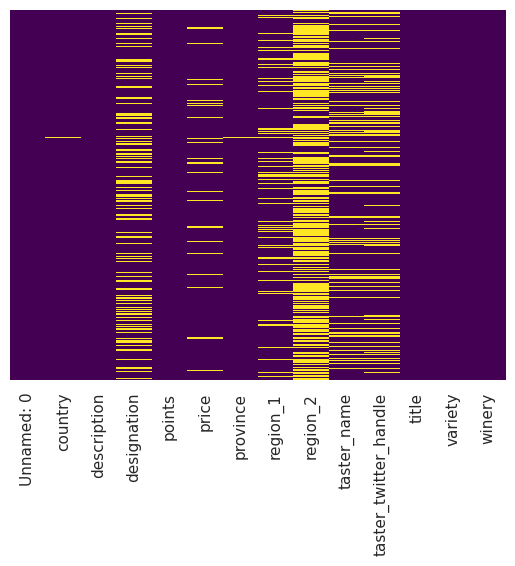

In [7]:
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

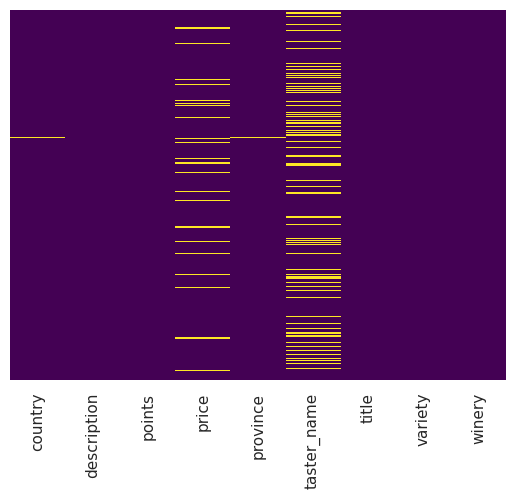

In [8]:
wine = wine.drop(columns=['Unnamed: 0','region_1','region_2','taster_twitter_handle','designation'])
wine1 = wine
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

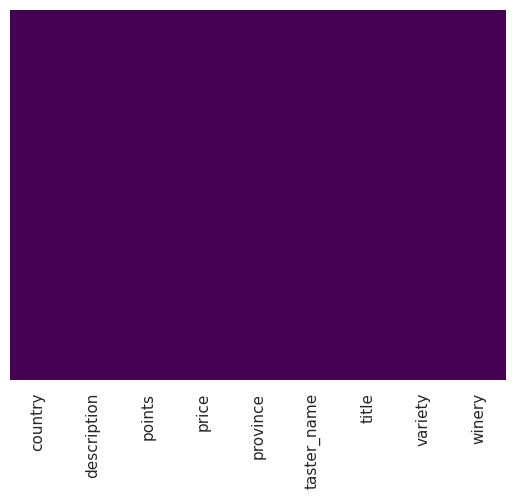

In [9]:
wine1.price.fillna(wine.price.dropna().median(),inplace =True)
wine1 = wine.dropna()
sns.heatmap(wine1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='price'>

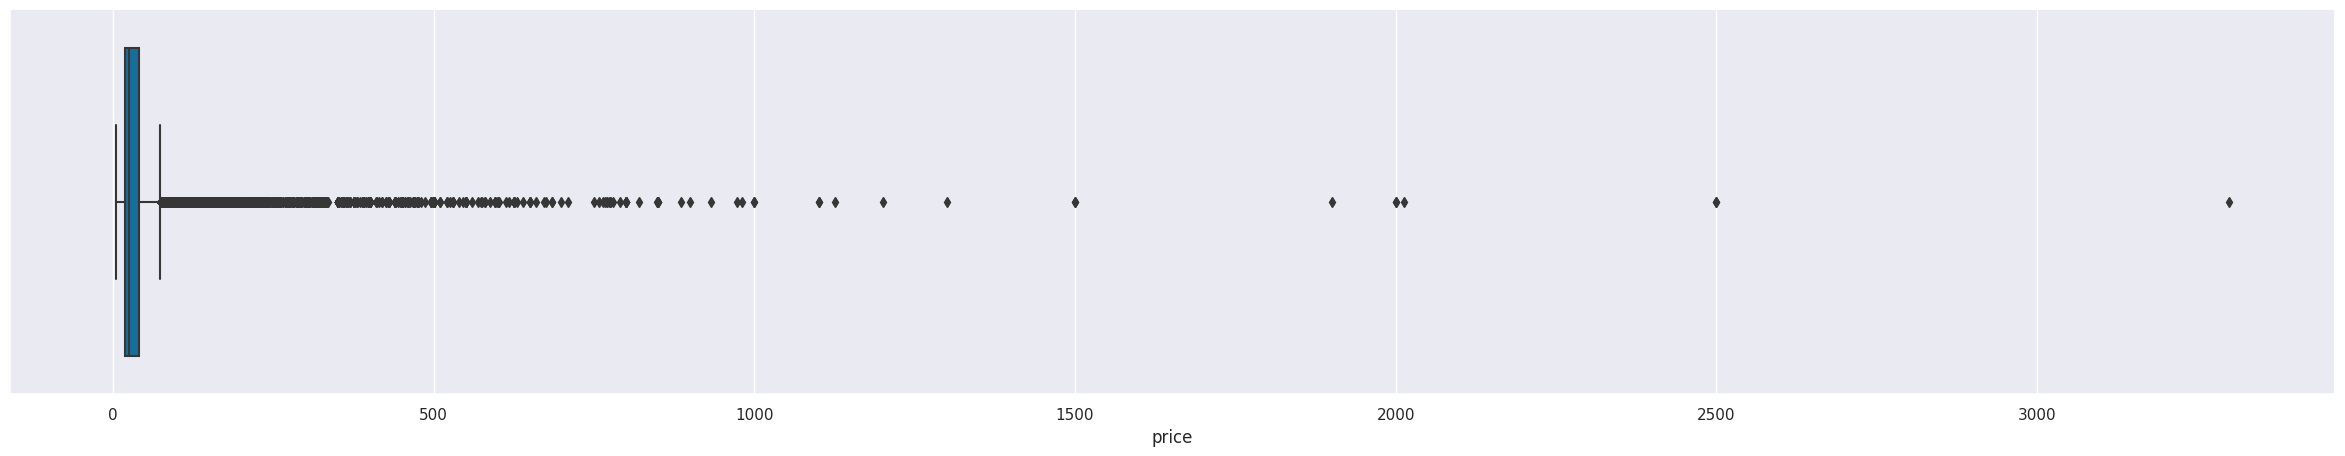

In [10]:
plt.figure(figsize=(30,5))
sns.boxplot(x=wine['price'],palette = 'colorblind')

<Axes: xlabel='price'>

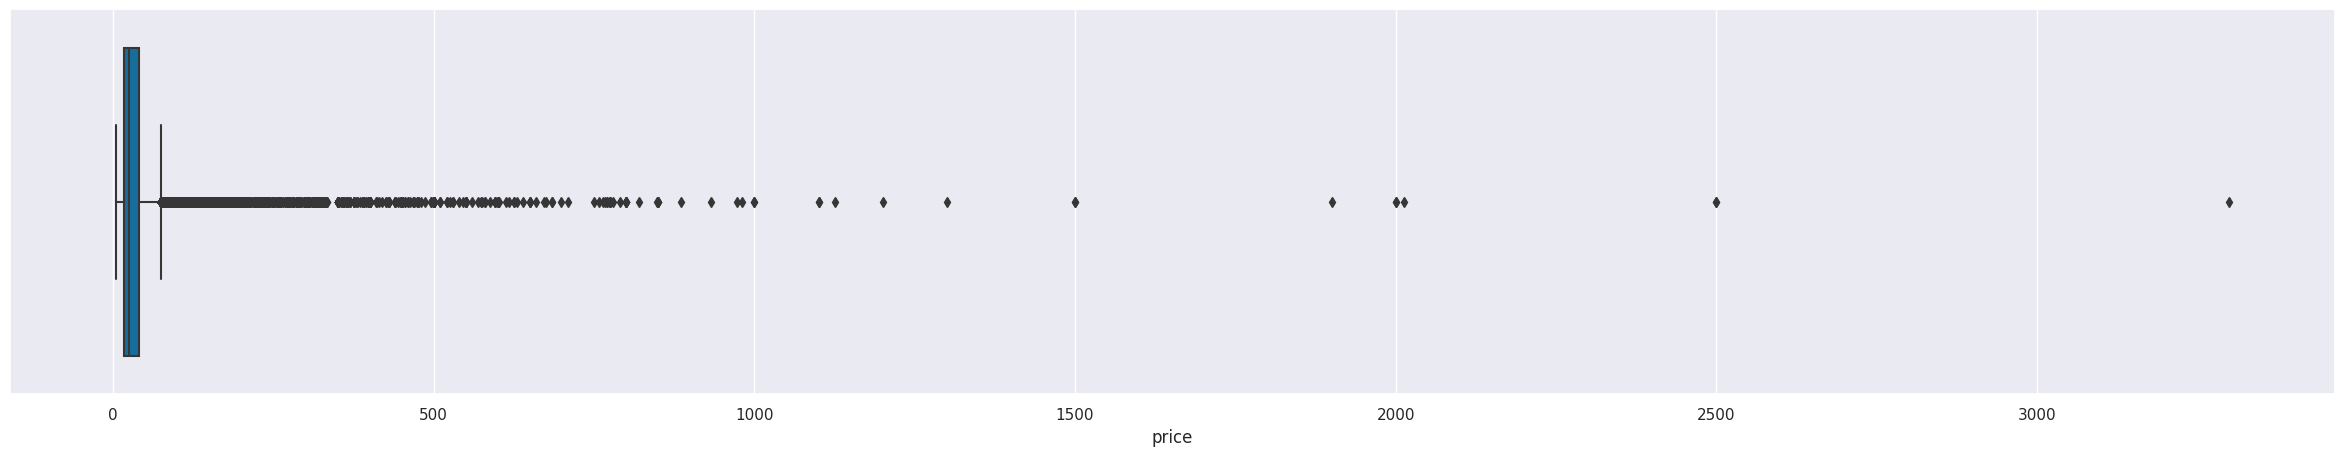

In [11]:
plt.figure(figsize=(30,5))
sns.boxplot(x=wine1['price'],palette = 'colorblind')

<Axes: xlabel='points'>

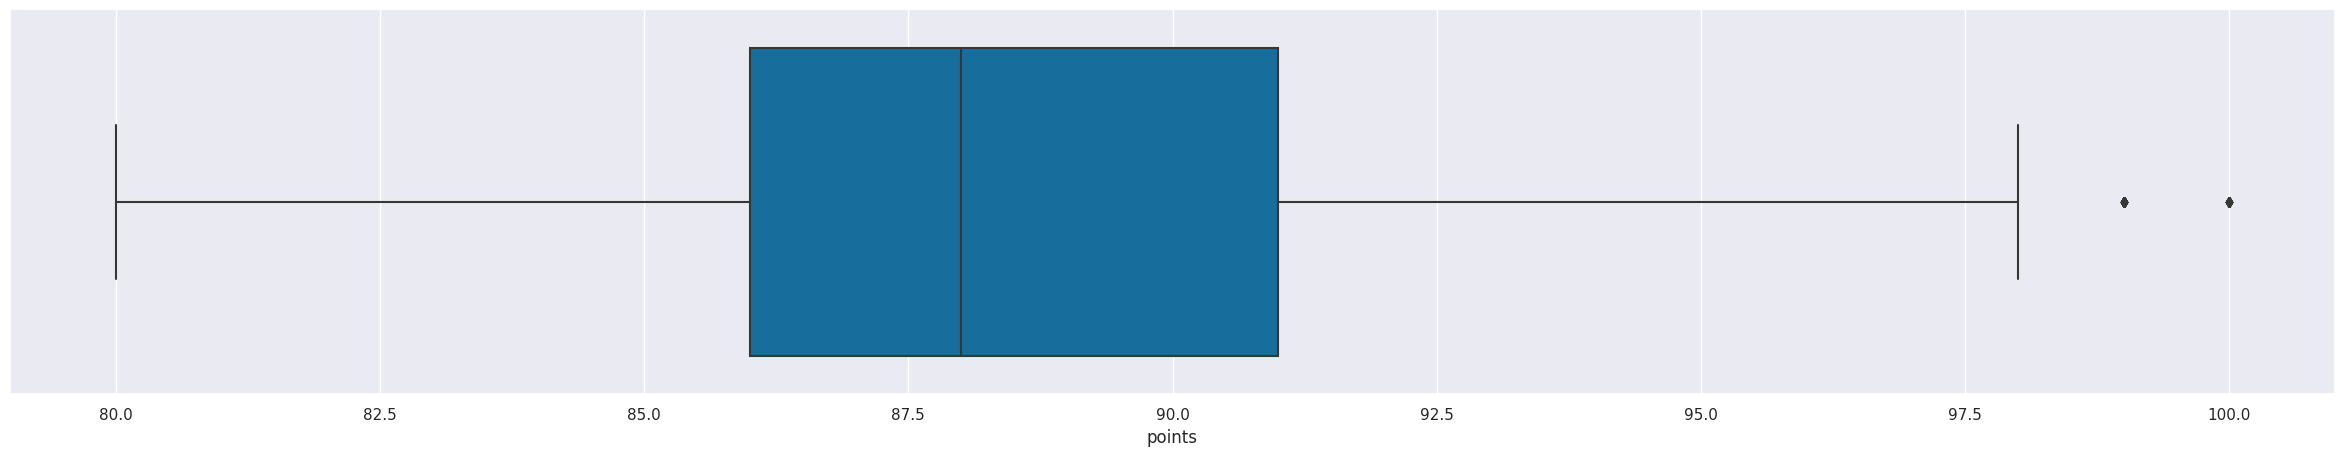

In [12]:
plt.figure(figsize=(30,5))
sns.boxplot(x=wine['points'],palette = 'colorblind')

In [13]:
for feature in wine1.columns:
    uniq = np.unique(wine1[feature])
    print('{}: {} distinct values\n'.format(feature,len(uniq)))

country: 43 distinct values

description: 94984 distinct values

points: 21 distinct values

price: 381 distinct values

province: 420 distinct values

taster_name: 19 distinct values

title: 94090 distinct values

variety: 664 distinct values

winery: 14559 distinct values



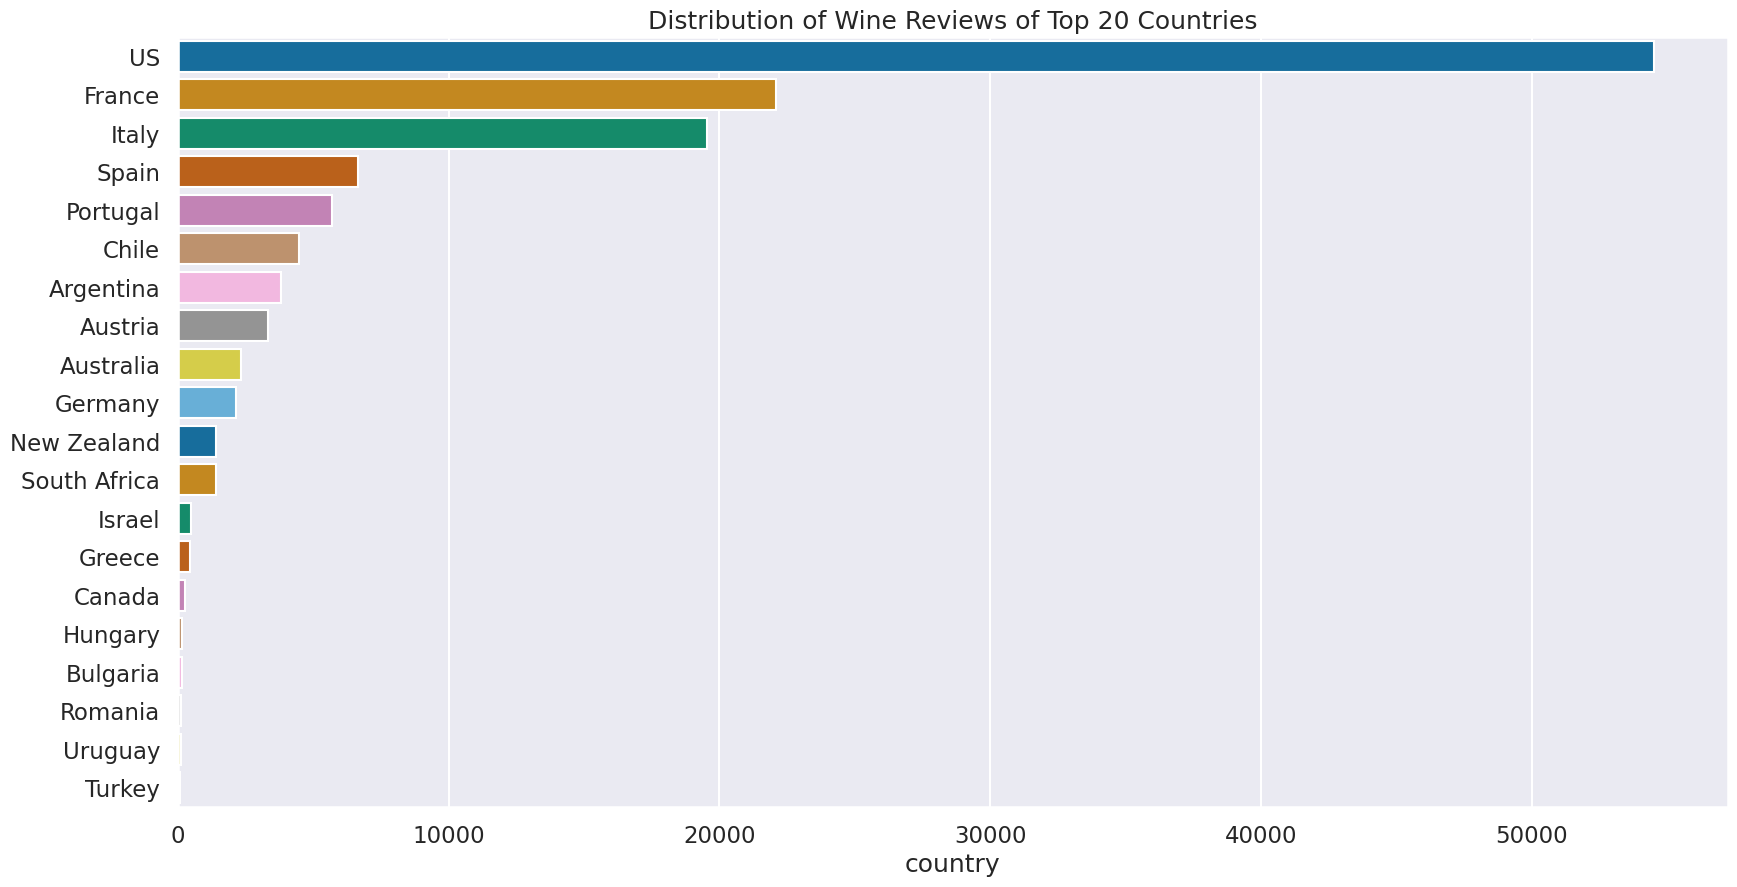

In [14]:
sns.set_context('talk')
plt.figure(figsize=(20,10))
cnt = wine['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='colorblind',orient='h')
plt.title('Distribution of Wine Reviews of Top 20 Countries');

<ipython-input-15-c4949770f940>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = wine1.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()


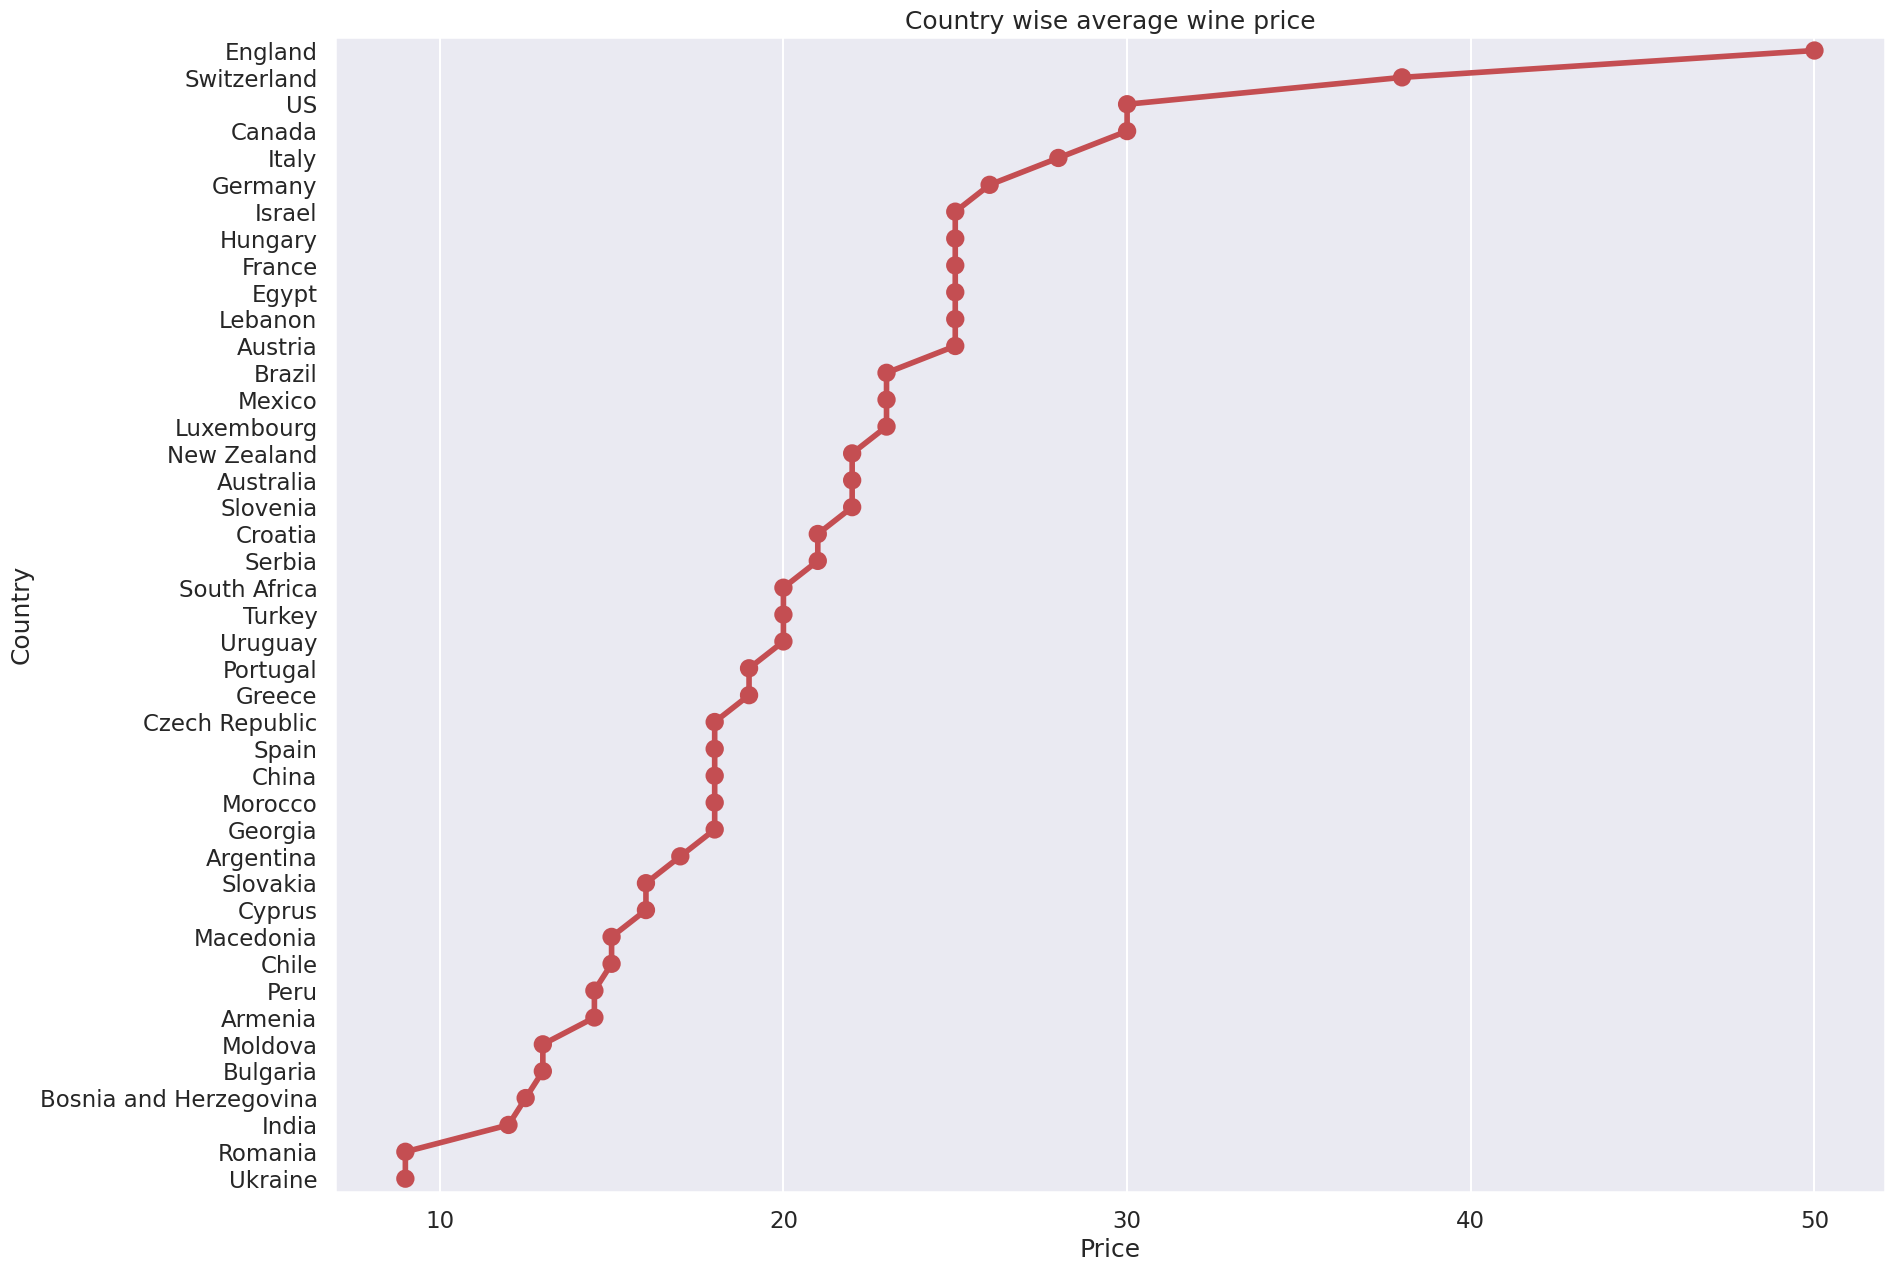

In [15]:
cnt = wine1.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,15))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

<ipython-input-16-92065755b936>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = wine.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()


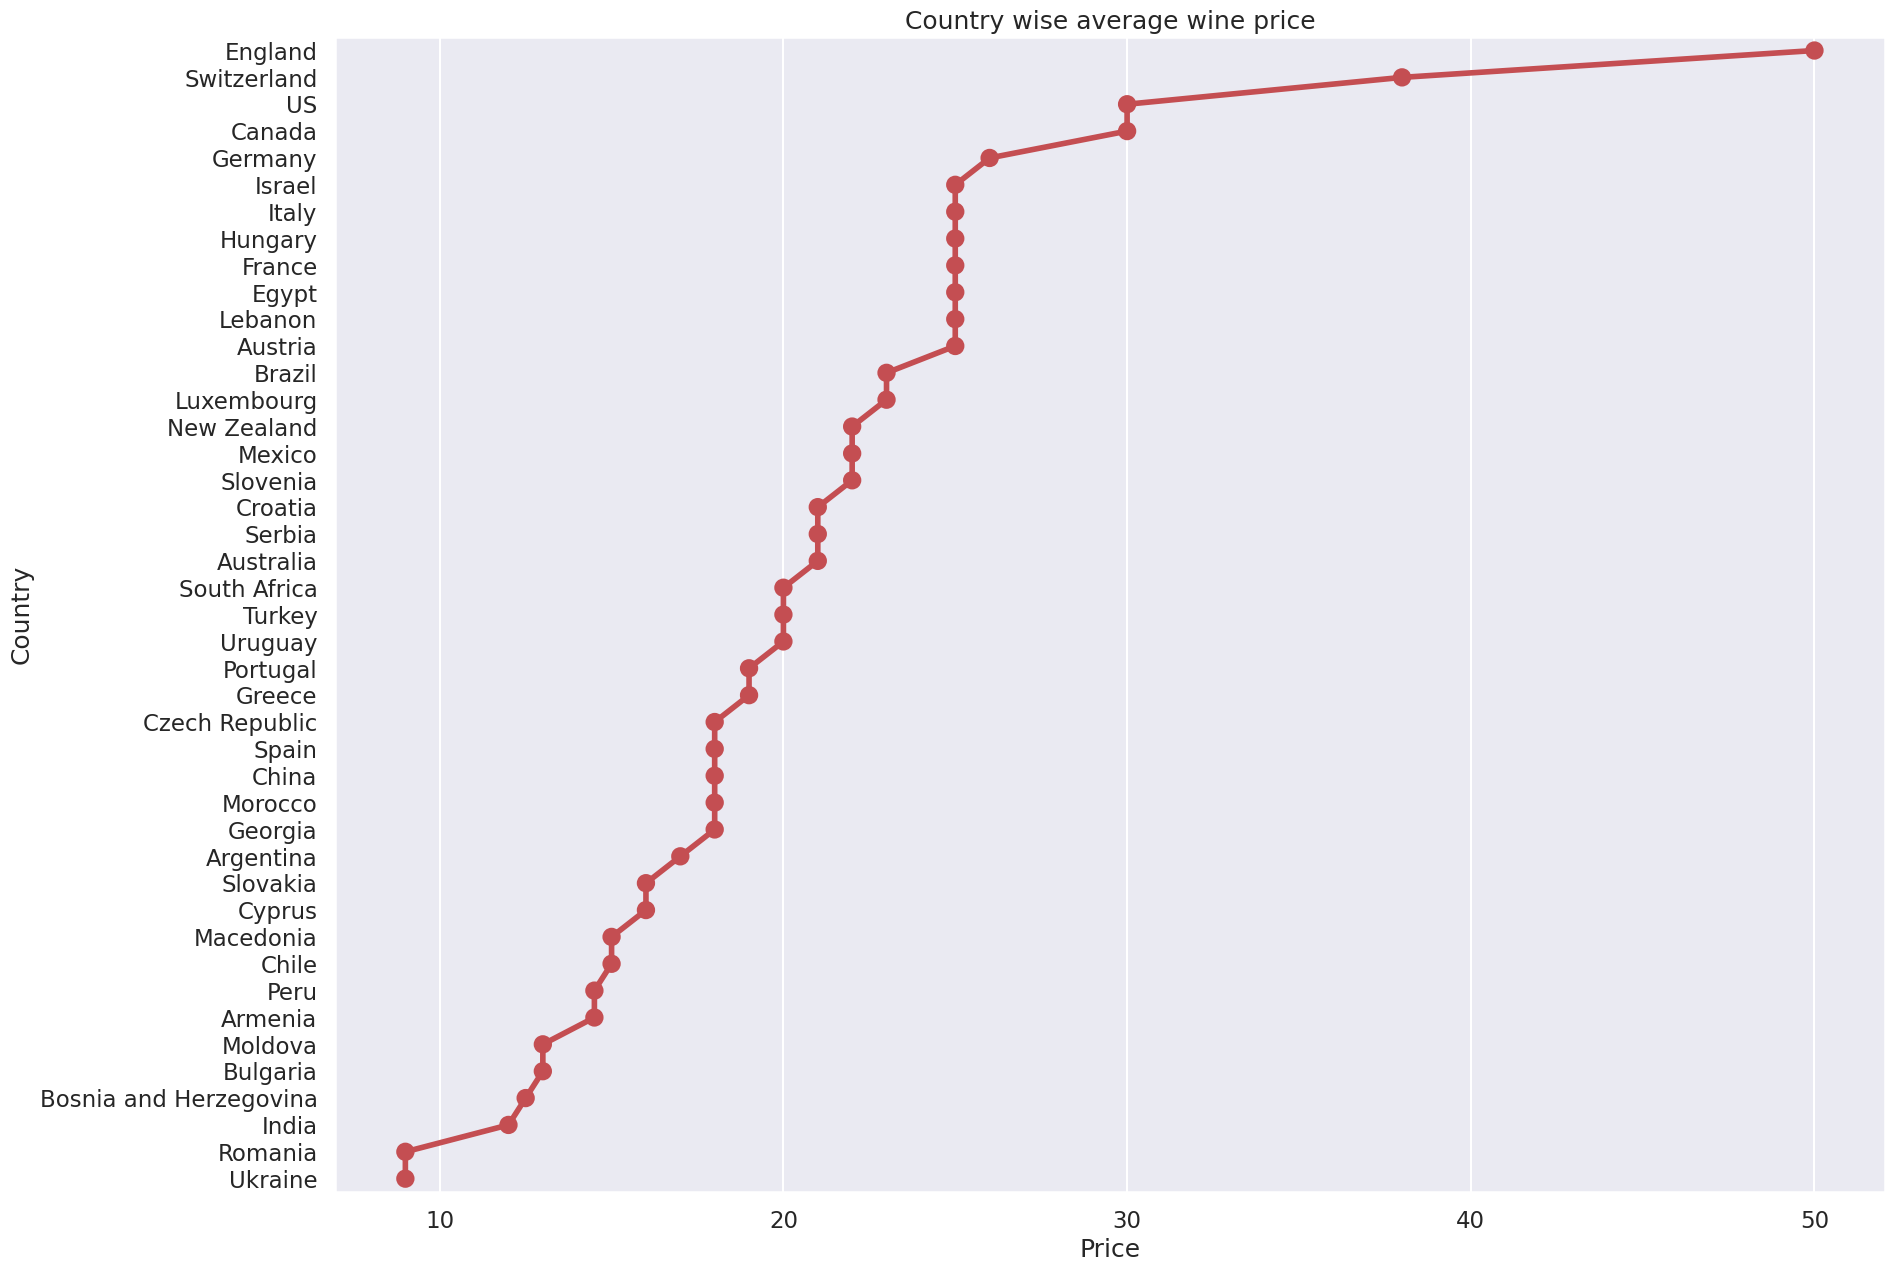

In [16]:
cnt = wine.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,15))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

<ipython-input-17-74cb5e6b7429>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = wine.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()


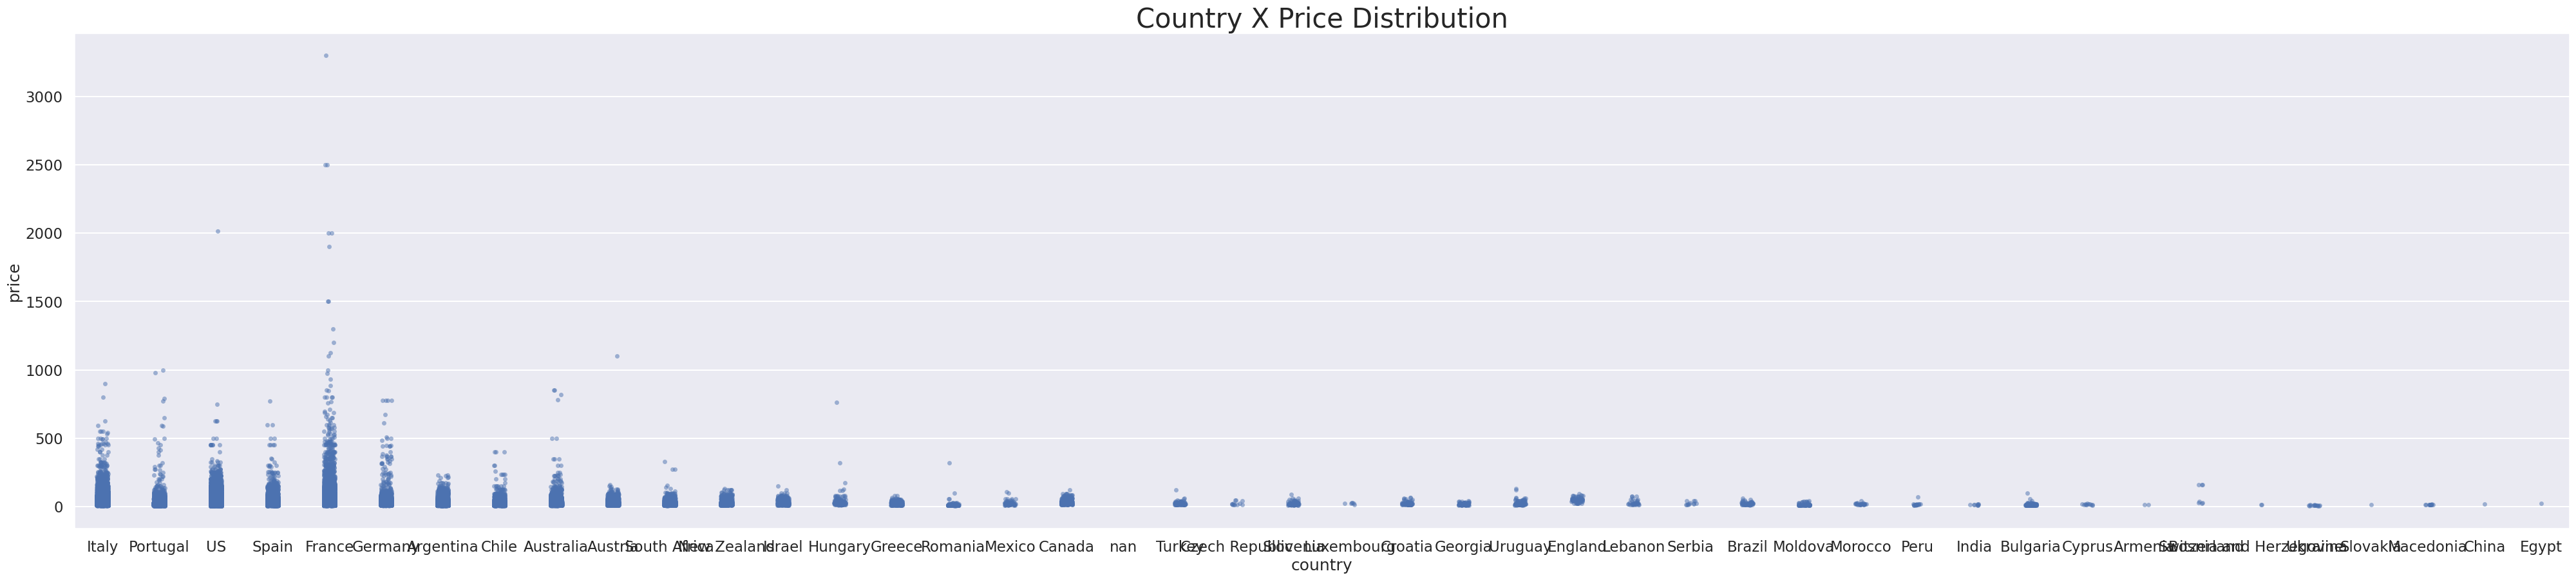

In [17]:
cnt = wine.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize = (50,10))
g2 = sns.stripplot(y='price', x= 'country', 
                   data=wine, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.5)
g2.set_title("Country X Price Distribution", fontsize=30)
plt.show()

Text(0.5, 0, '')

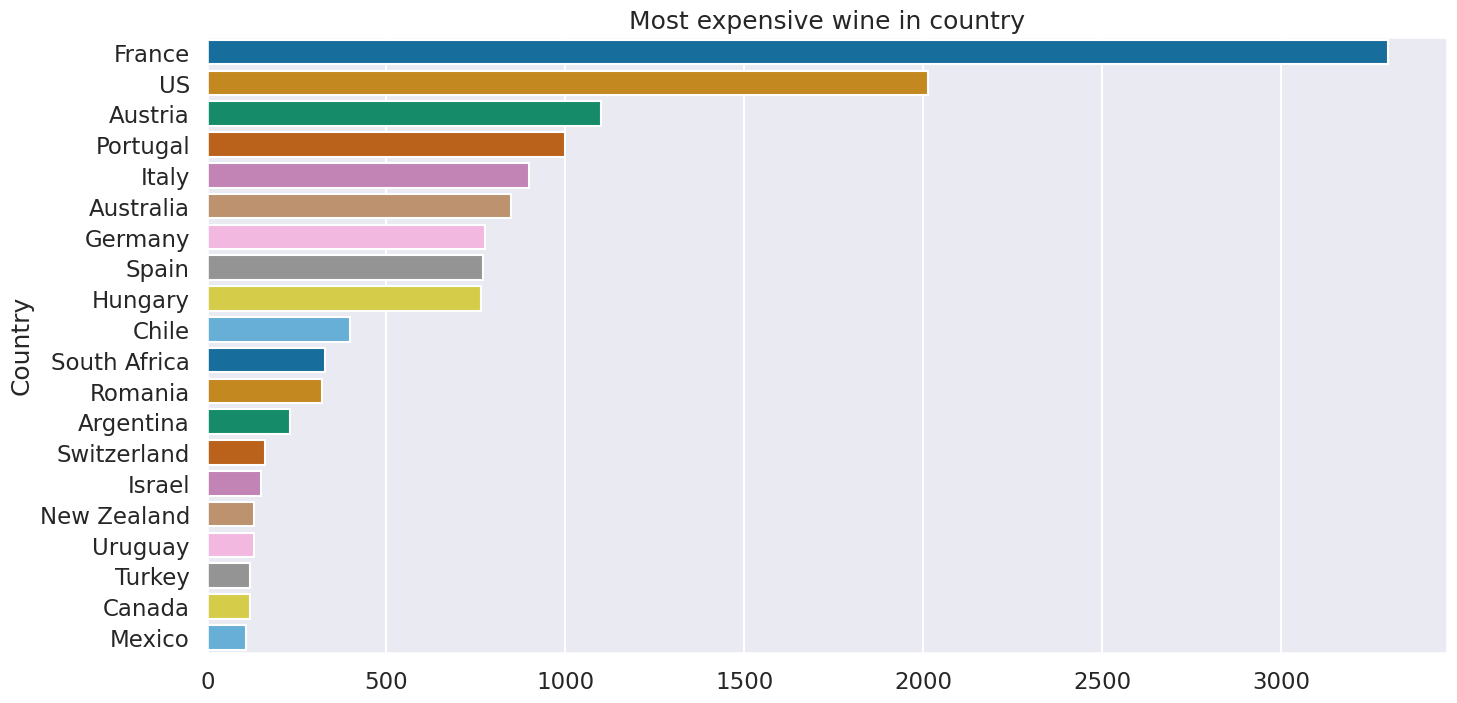

In [18]:
plt.figure(figsize=(16,8))

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:20]
g2 = sns.barplot(x = cnt['price'], y = cnt.index, palette= 'colorblind')
g2.set_title('Most expensive wine in country')
g2.set_ylabel('Country')
g2.set_xlabel('')

<ipython-input-19-26a82ed89c00>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()


Text(0, 0.5, 'Country')

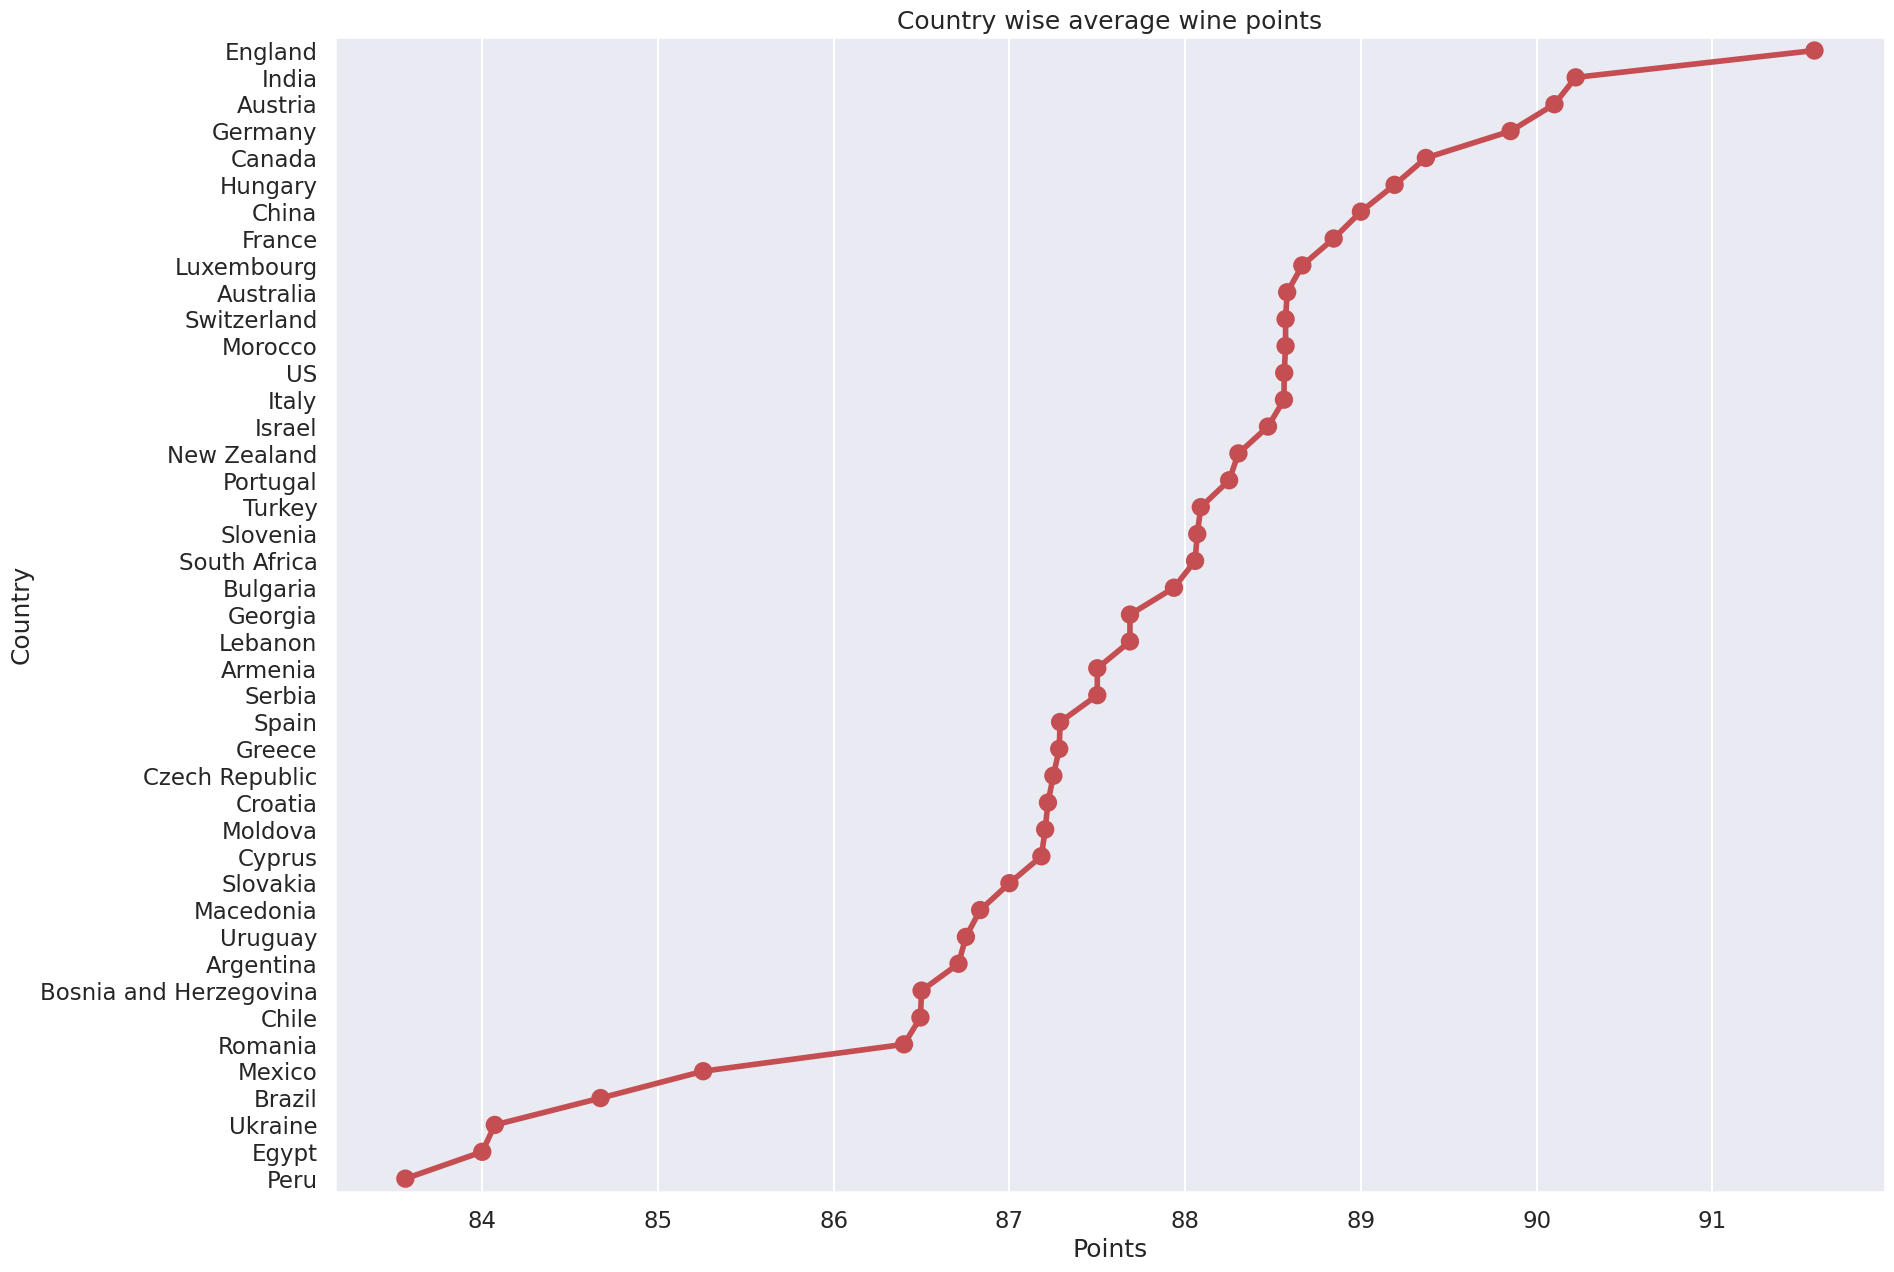

In [19]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,15))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine points')
plt.xlabel('Points')
plt.ylabel('Country')

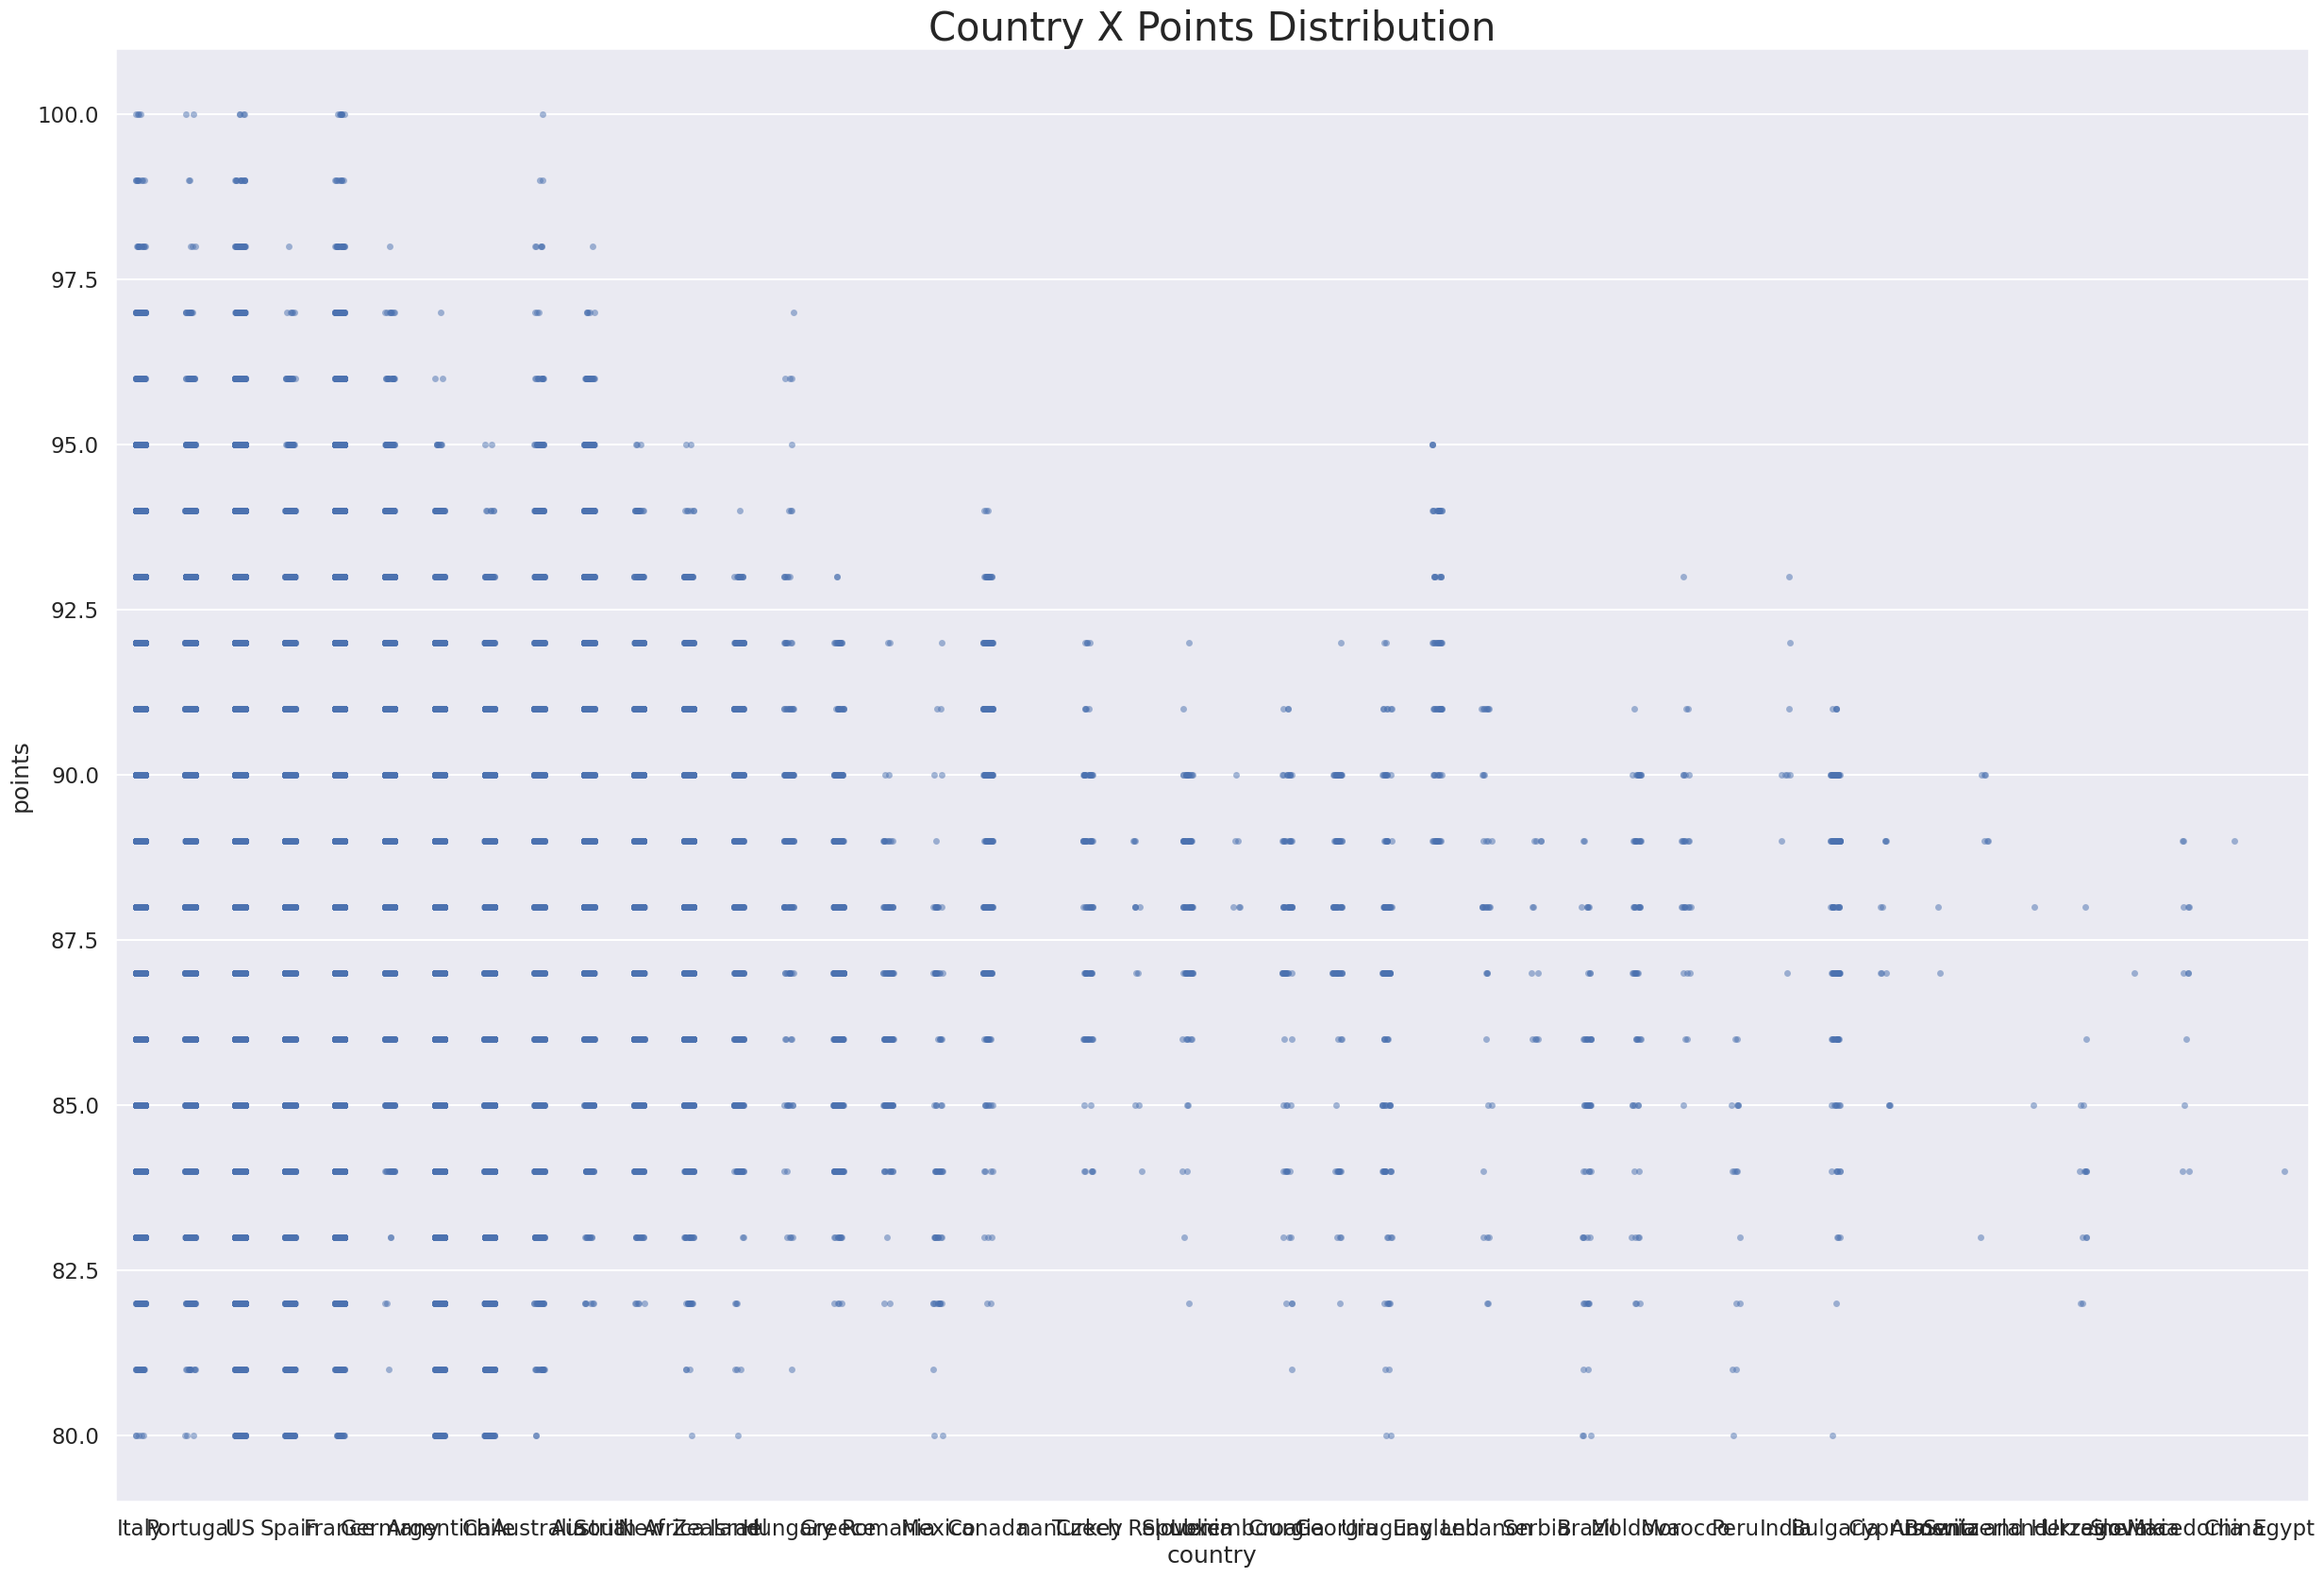

In [20]:
plt.figure(figsize = (30,20))
g2 = sns.stripplot(y='points', x= 'country', 
                   data=wine, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.5)
g2.set_title("Country X Points Distribution", fontsize=30)
plt.show()

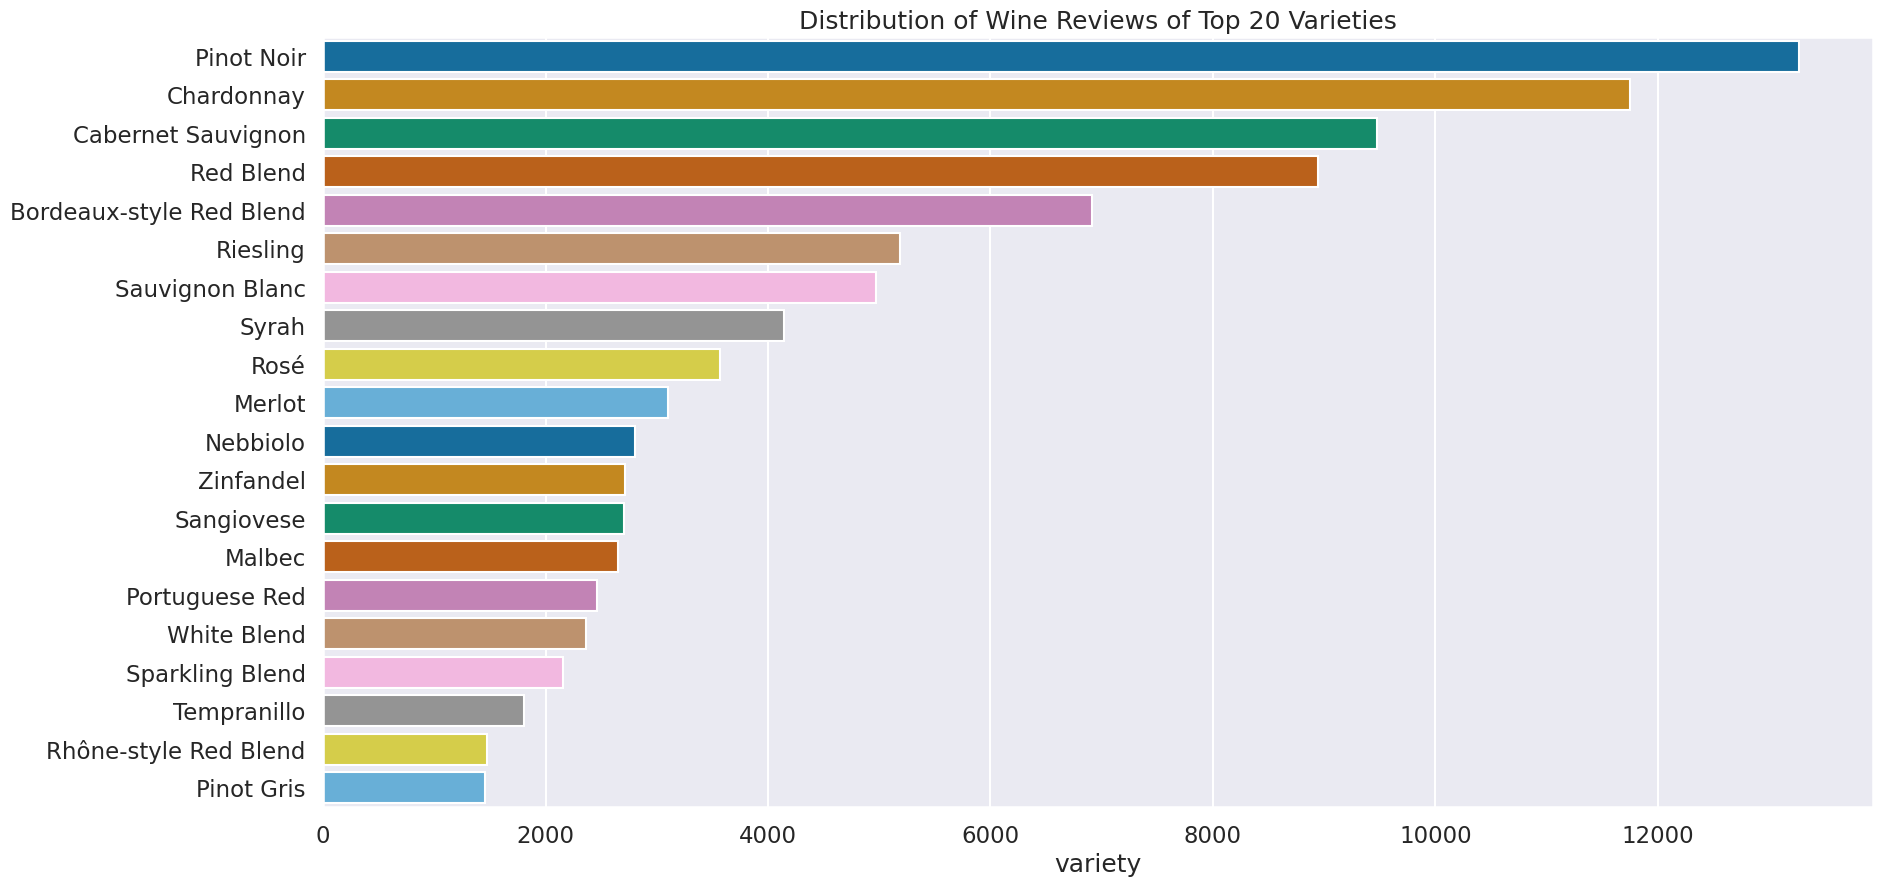

In [21]:
sns.set_context("talk")
plt.figure(figsize=(20,10))
cnt = wine['variety'].value_counts().to_frame()[0:20]
sns.barplot(x= cnt['variety'], y =cnt.index, data=cnt, palette='colorblind',orient='h')
plt.title('Distribution of Wine Reviews of Top 20 Varieties');

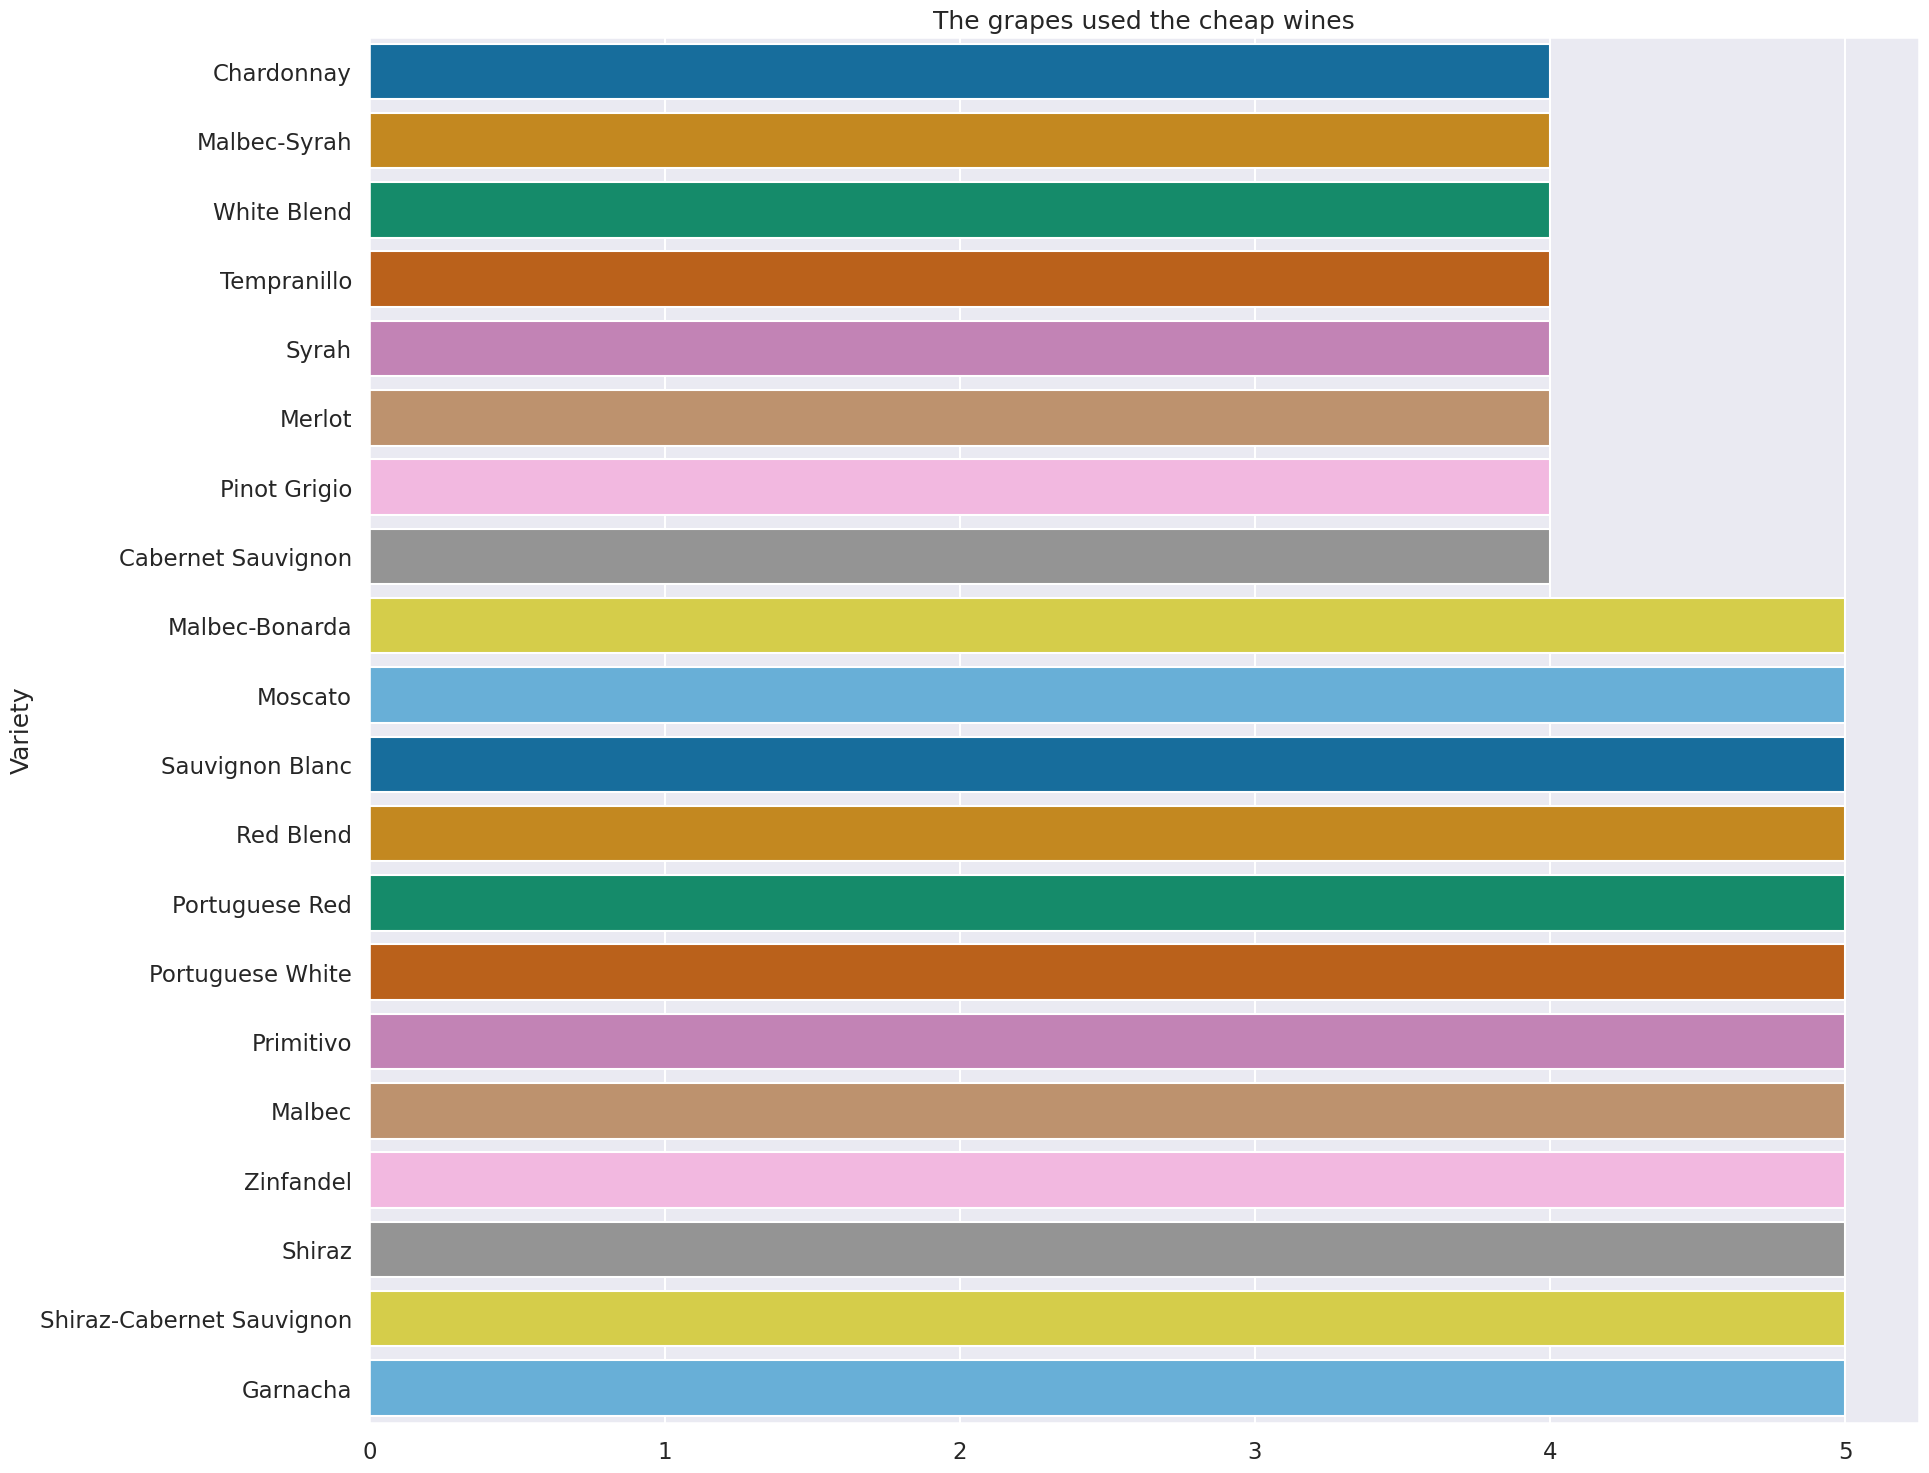

In [22]:
sns.set_context("talk")
plt.figure(figsize=(20,18))
cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:20]
g2 = sns.barplot(x = cnt['price'], y = cnt.index, palette= 'colorblind')
g2.set_title('The grapes used the cheap wines')
g2.set_ylabel('Variety')
g2.set_xlabel('')
plt.show()

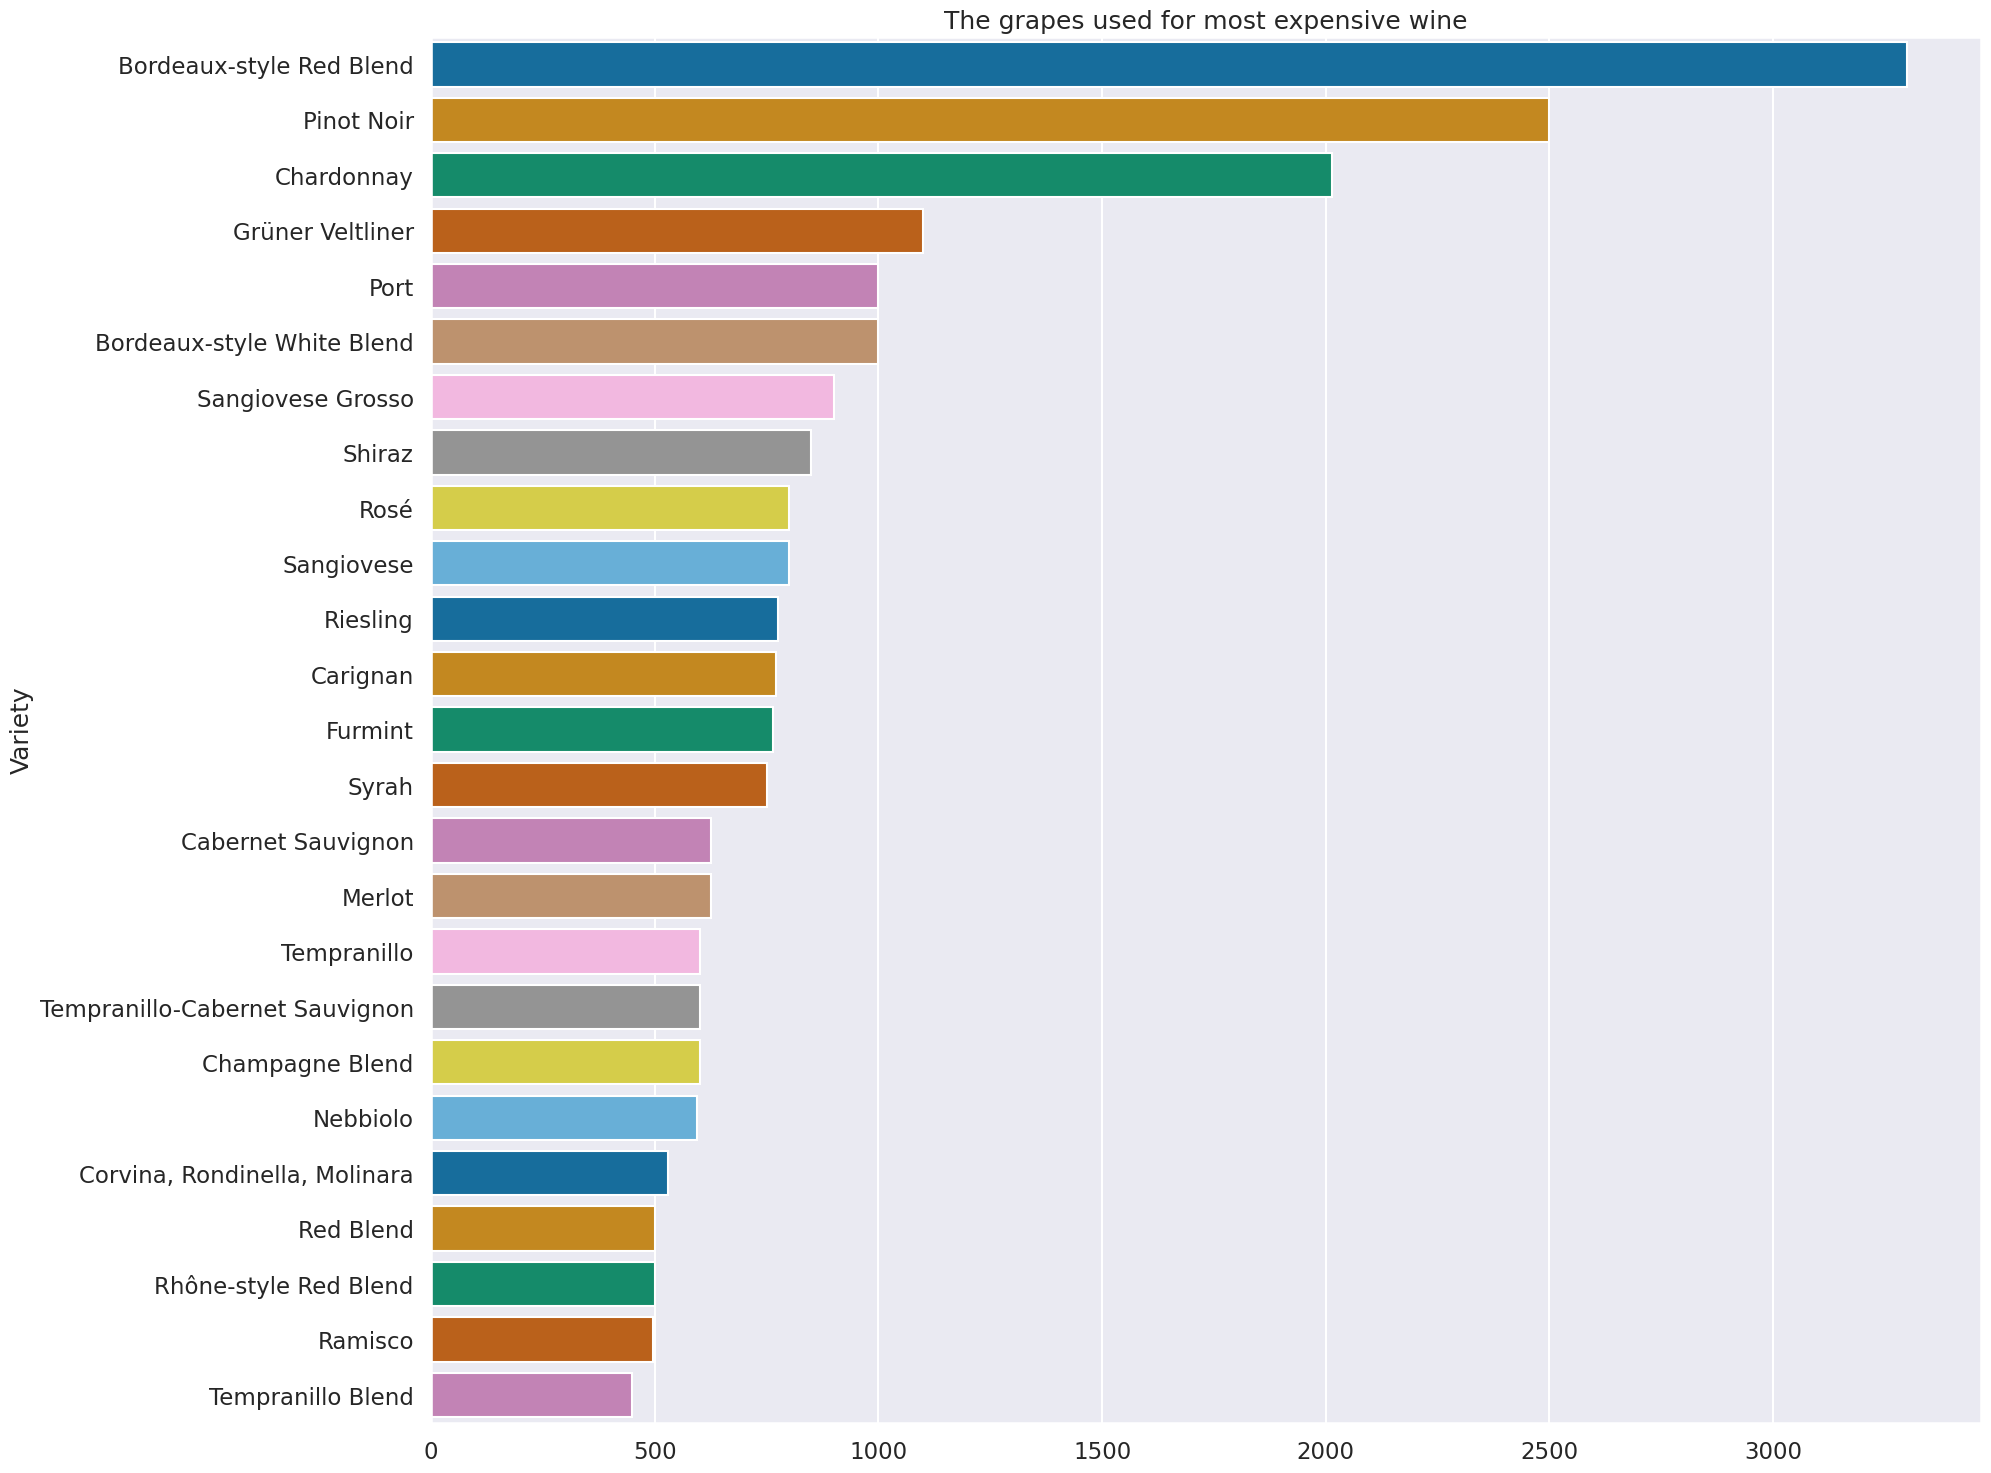

In [23]:
plt.figure(figsize=(20,18))
cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:25]
g2 = sns.barplot(x = cnt['price'], y = cnt.index, palette= 'colorblind')
g2.set_title('The grapes used for most expensive wine')
g2.set_ylabel('Variety')
g2.set_xlabel('')
plt.show()

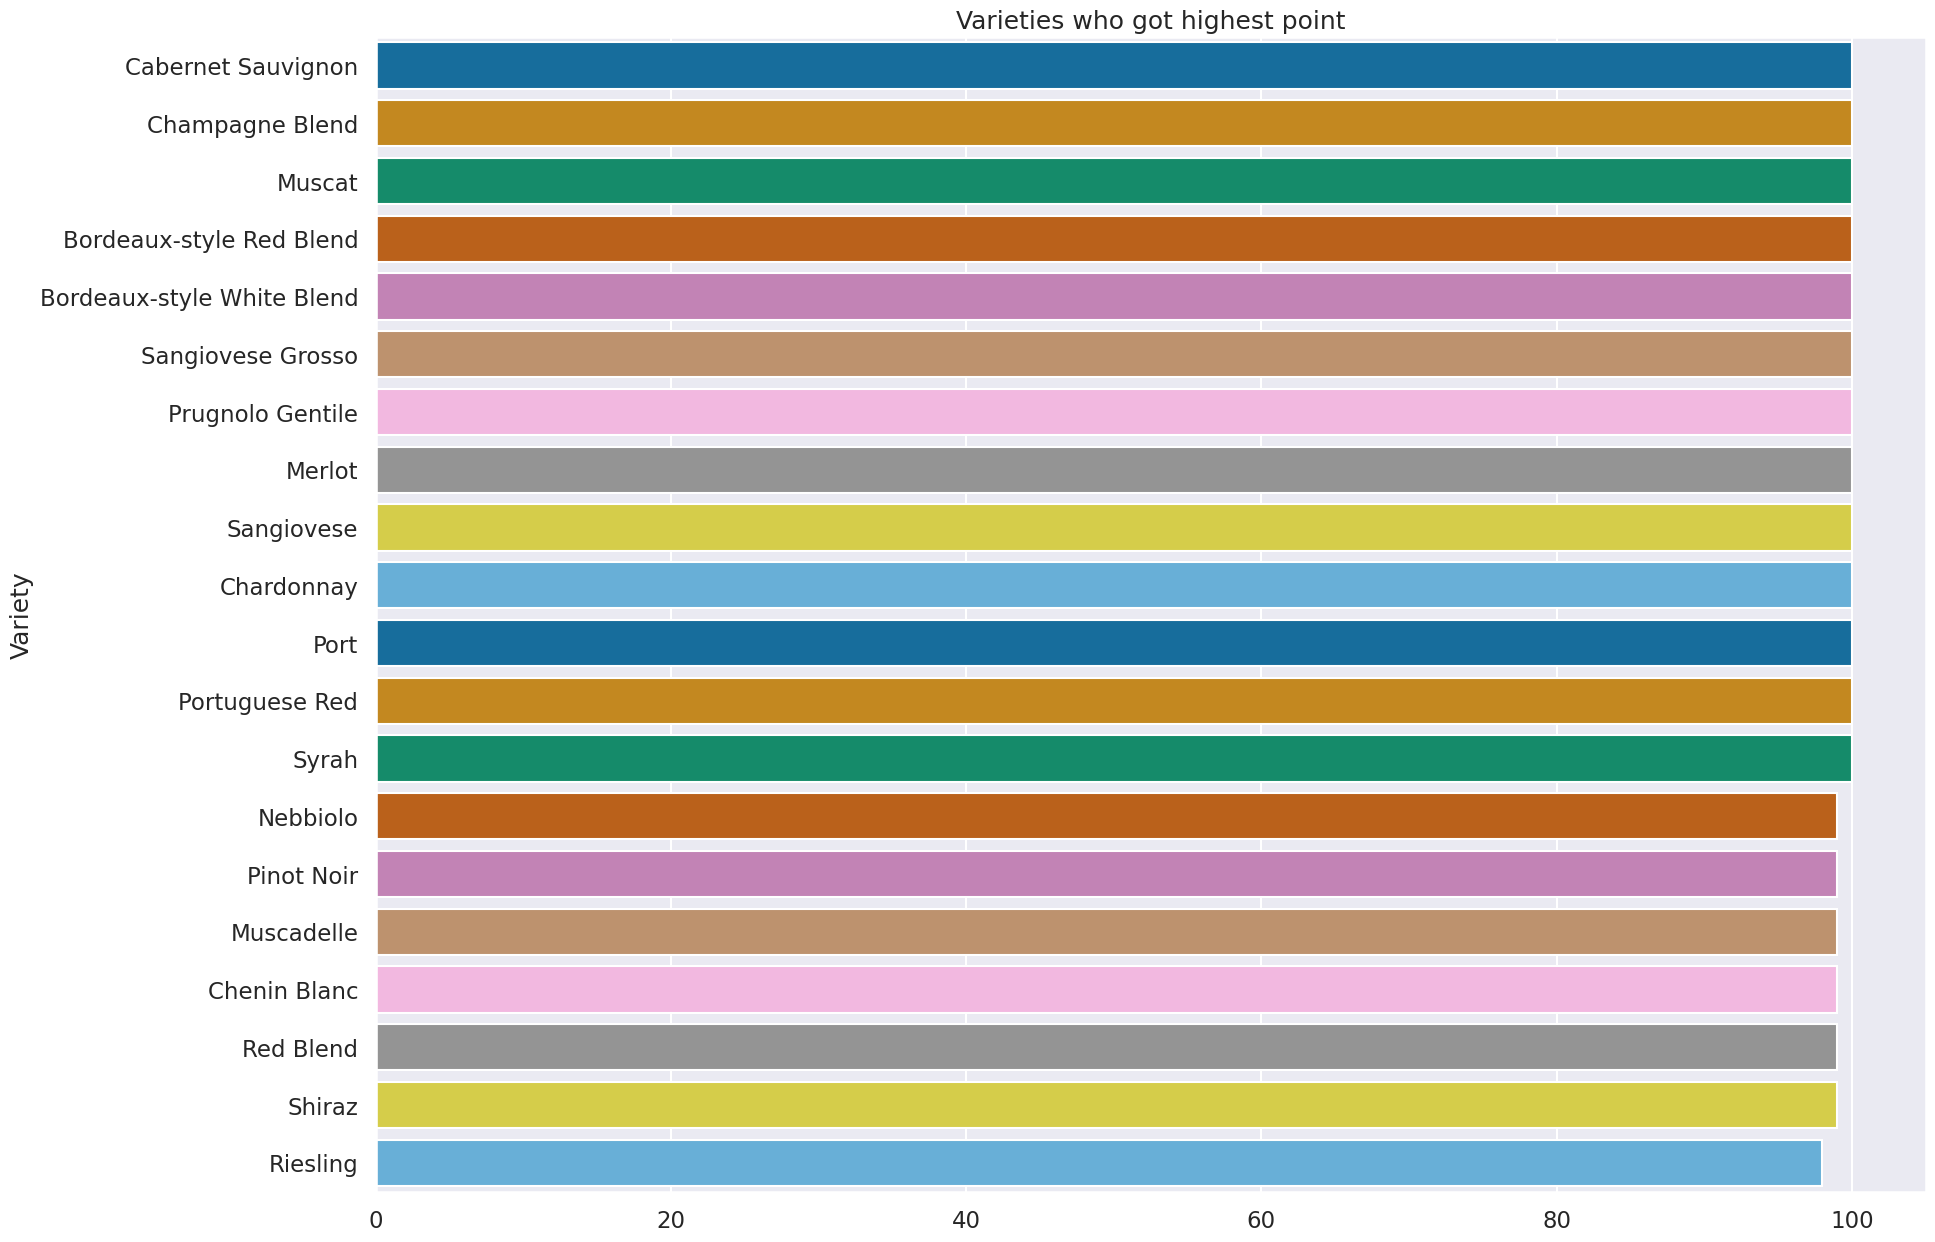

In [24]:
plt.figure(figsize=(20,15))
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:20]
g2 = sns.barplot(x = cnt['points'], y = cnt.index, palette= 'colorblind')
g2.set_title('Varieties who got highest point')
g2.set_ylabel('Variety')
g2.set_xlabel('')
plt.show()

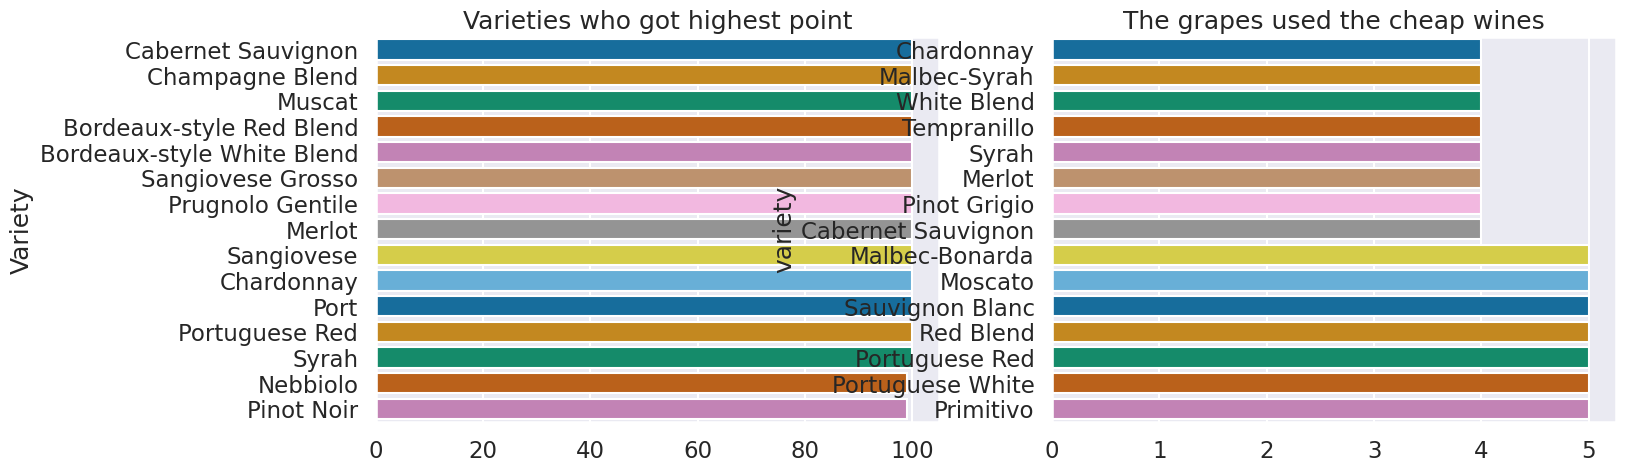

In [25]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
g2 = sns.barplot(x = cnt['points'], y = cnt.index, palette= 'colorblind')
g2.set_title('Varieties who got highest point')
g2.set_ylabel('Variety')
g2.set_xlabel('')

plt.subplot(1,2,2)
cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
g2 = sns.barplot(x = cnt['price'], y = cnt.index, palette= 'colorblind')
g2.set_title('The grapes used the cheap wines')
g2.set_xlabel('')
plt.show()

In [26]:
highest_point = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
cheap = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:25]

s1 = pd.merge(highest_point, cheap, how='inner', on=['variety'])
print(s1)

                    points  price
variety                          
Cabernet Sauvignon     100    4.0
Merlot                 100    4.0
Chardonnay             100    4.0
Portuguese Red         100    5.0
Syrah                  100    4.0
Pinot Noir              99    5.0


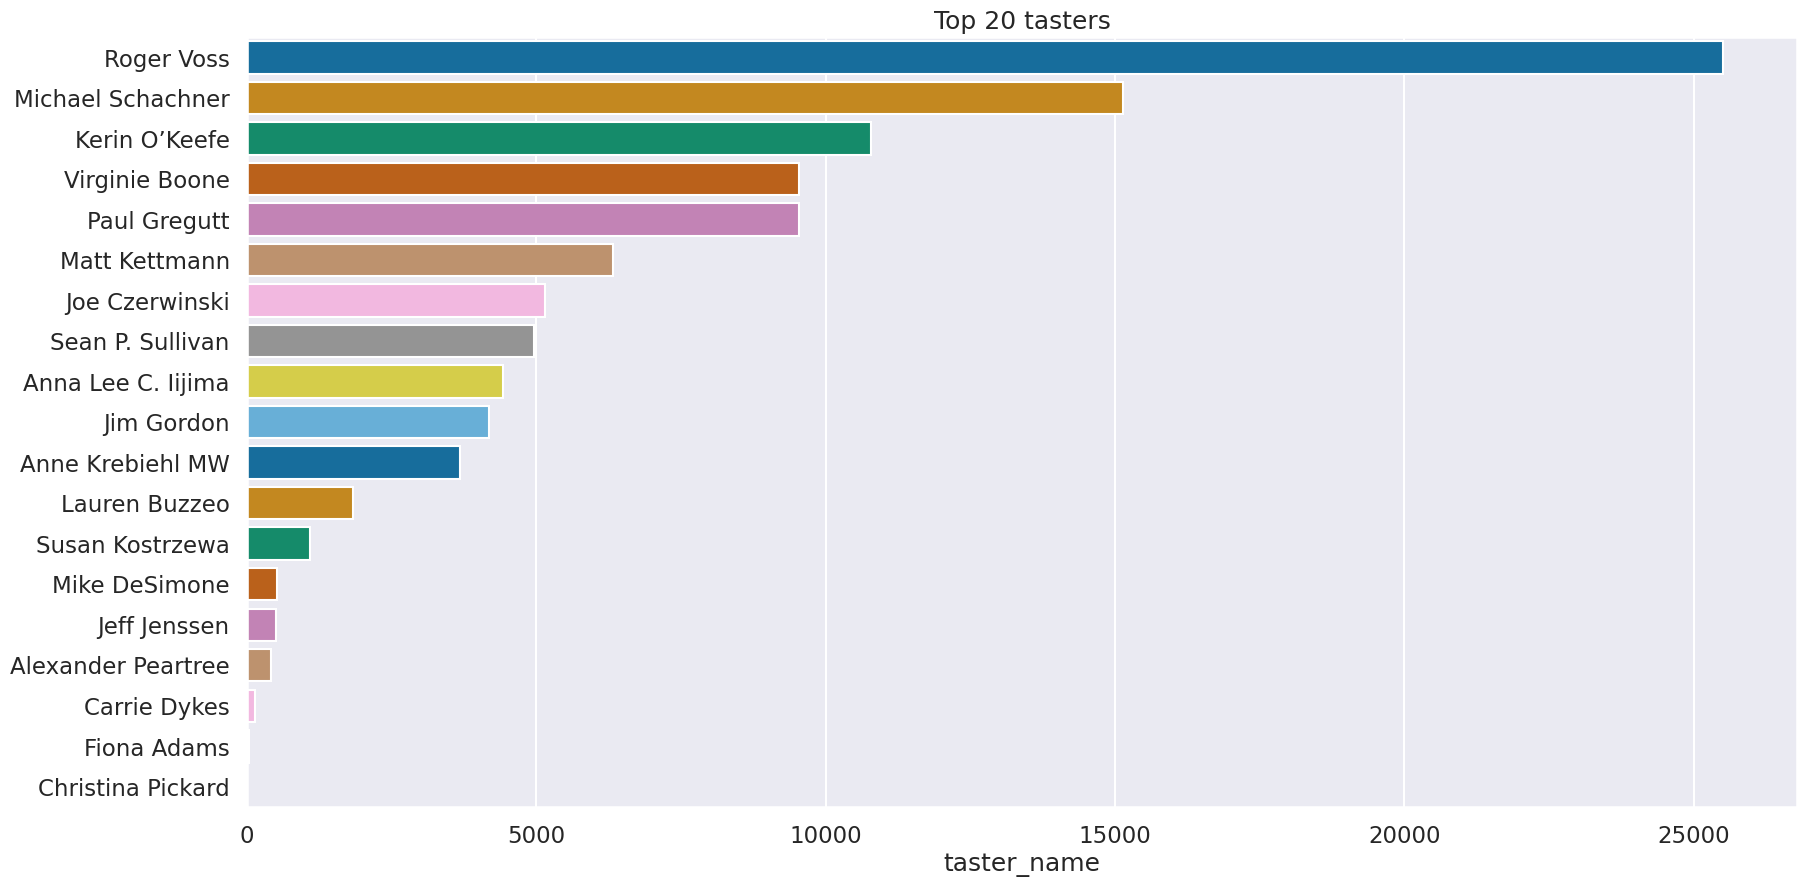

In [27]:
plt.figure(figsize=(20,10))
cnt = wine['taster_name'].value_counts().to_frame()[0:20]
sns.barplot(x= cnt['taster_name'], y =cnt.index, data=cnt, palette='colorblind',orient='h')
plt.title('Top 20 tasters')
plt.show()

In [28]:
wine.groupby("taster_name")["points"].describe()

count       mean       std   min   25%   50%   75%  \
taster_name                                                                
Alexander Peartree    415.0  85.855422  1.934511  80.0  85.0  86.0  87.0   
Anna Lee C. Iijima   4415.0  88.415629  2.561359  80.0  87.0  88.0  90.0   
Anne Krebiehl MW     3685.0  90.562551  2.373100  80.0  89.0  90.0  92.0   
Carrie Dykes          139.0  86.395683  1.998618  81.0  85.0  87.0  88.0   
Christina Pickard       6.0  87.833333  3.600926  82.0  87.0  88.0  89.0   
Fiona Adams            27.0  86.888889  1.739437  82.0  86.0  87.0  88.0   
Jeff Jenssen          491.0  88.319756  2.022727  82.0  87.0  89.0  89.0   
Jim Gordon           4177.0  88.626287  2.698341  80.0  87.0  89.0  91.0   
Joe Czerwinski       5147.0  88.536235  2.858701  80.0  87.0  89.0  91.0   
Kerin O’Keefe       10776.0  88.867947  2.474240  80.0  87.0  89.0  90.0   
Lauren Buzzeo        1835.0  87.739510  2.530672  81.0  86.0  88.0  90.0   
Matt Kettmann        6332.0  90.008686  2.571257  81.0  88.0  90.0  92.0   
Michael Schachner   15134.0  86.907493  3.022859  80.0  85.0  87.0  89.0   
Mike DeSimone         514.0  89.101167  1.992549  82.0  88.0  89.0  90.0   
Paul Gregutt         9532.0  89.082564  2.814445  80.0  87.0  89.0  91.0   
Roger Voss          25514.0  88.708003  3.036373  80.0  86.0  88.0  91.0   
Sean P. Sullivan     4966.0  88.755739  2.458547  80.0  87.0  89.0  91.0   
Susan Kostrzewa      1085.0  86.609217  2.376140  80.0  85.0  87.0  88.0   
Virginie Boone       9537.0  89.213379  2.996796  80.0  87.0  90.0  91.0   

                      max  
taster_name                
Alexander Peartree   91.0  
Anna Lee C. Iijima   98.0  
Anne Krebiehl MW     97.0  
Carrie Dykes         92.0  
Christina Pickard    93.0  
Fiona Adams          91.0  
Jeff Jenssen         97.0  
Jim Gordon           97.0  
Joe Czerwinski      100.0  
Kerin O’Keefe       100.0  
Lauren Buzzeo        95.0  
Matt Kettmann        97.0  
Michael Schachner    98.0  
Mike DeSimone        94.0  
Paul Gregutt        100.0  
Roger Voss          100.0  
Sean P. Sullivan     97.0  
Susan Kostrzewa      94.0  
Virginie Boone       99.0

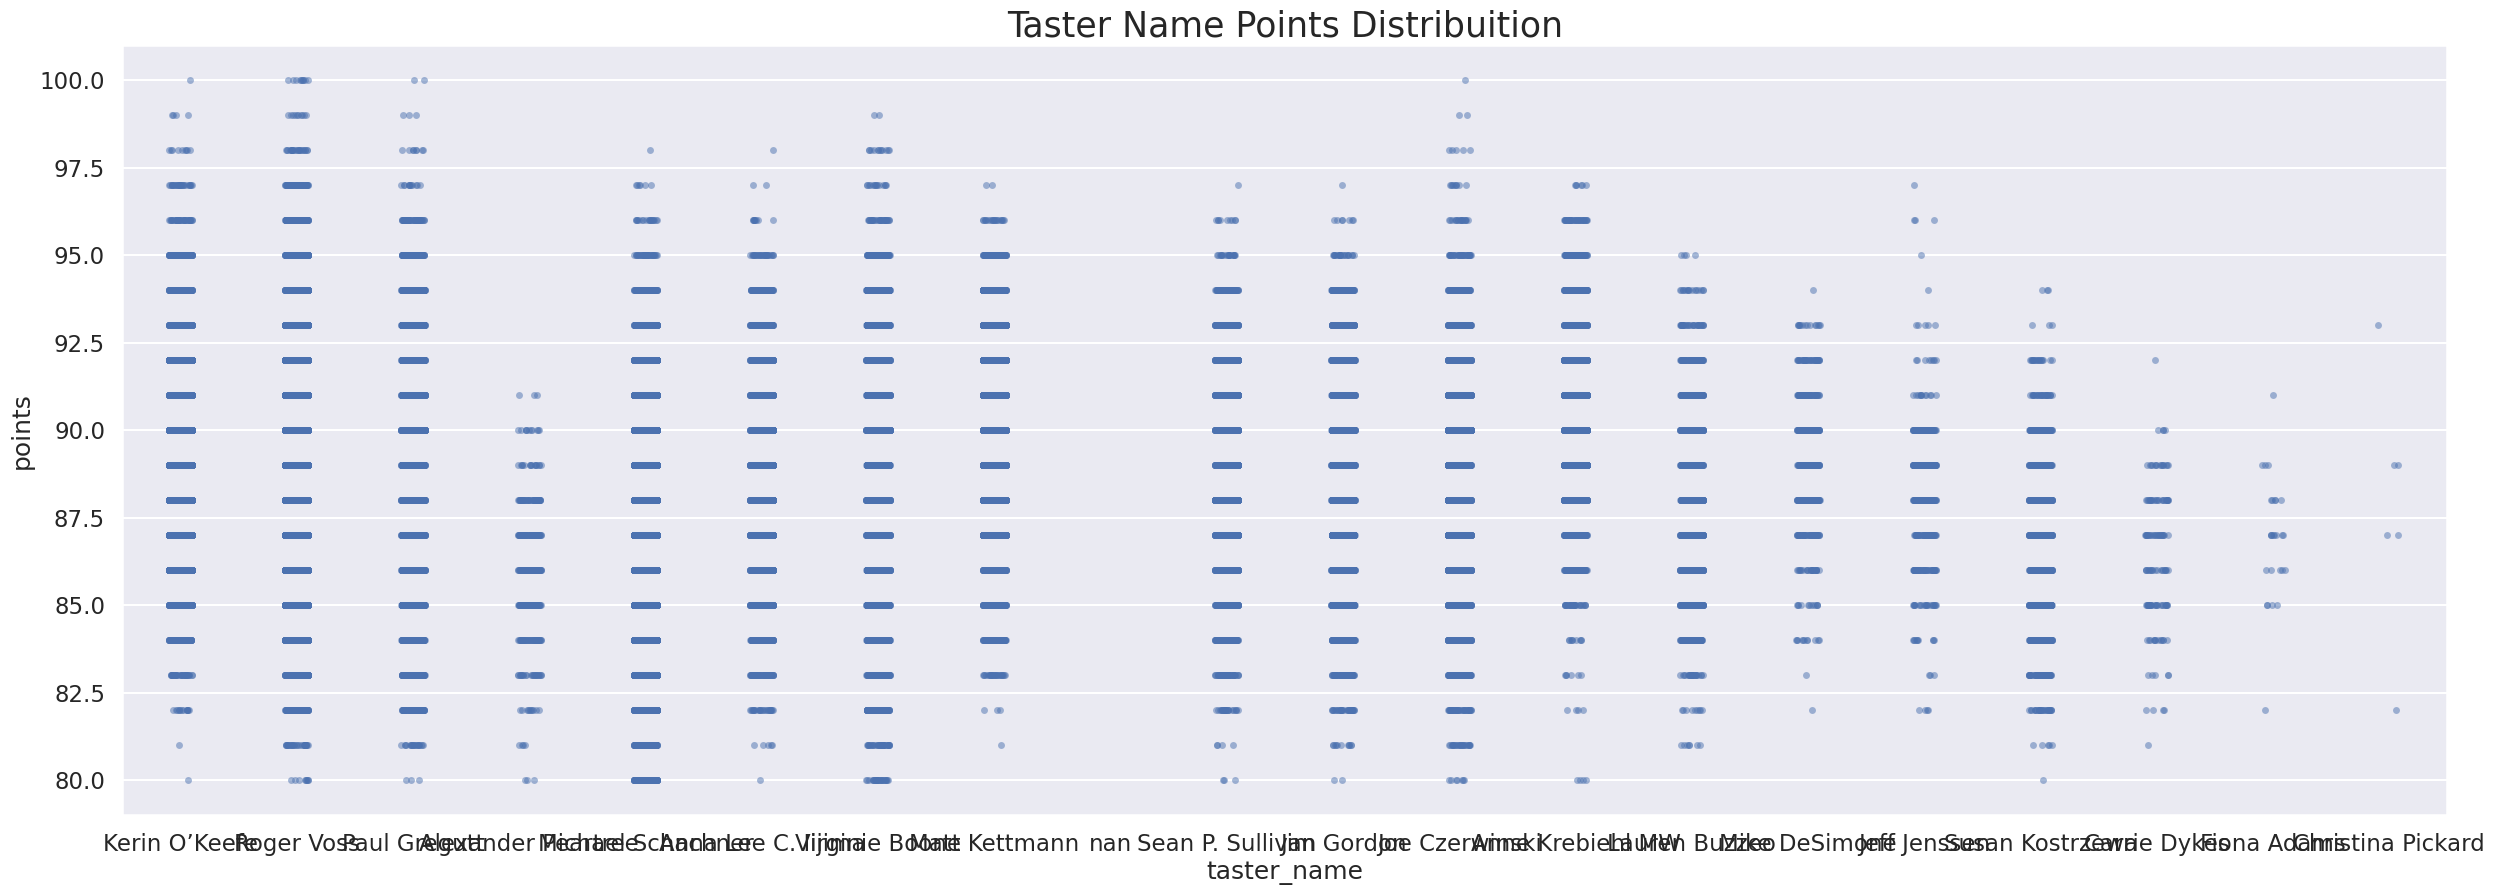

In [29]:
plt.figure(figsize = (30,10))
g2 = sns.stripplot(y='points', x='taster_name', 
                   data=wine, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.5)
g2.set_title("Taster Name Points Distribuition", fontsize=25)
plt.show()

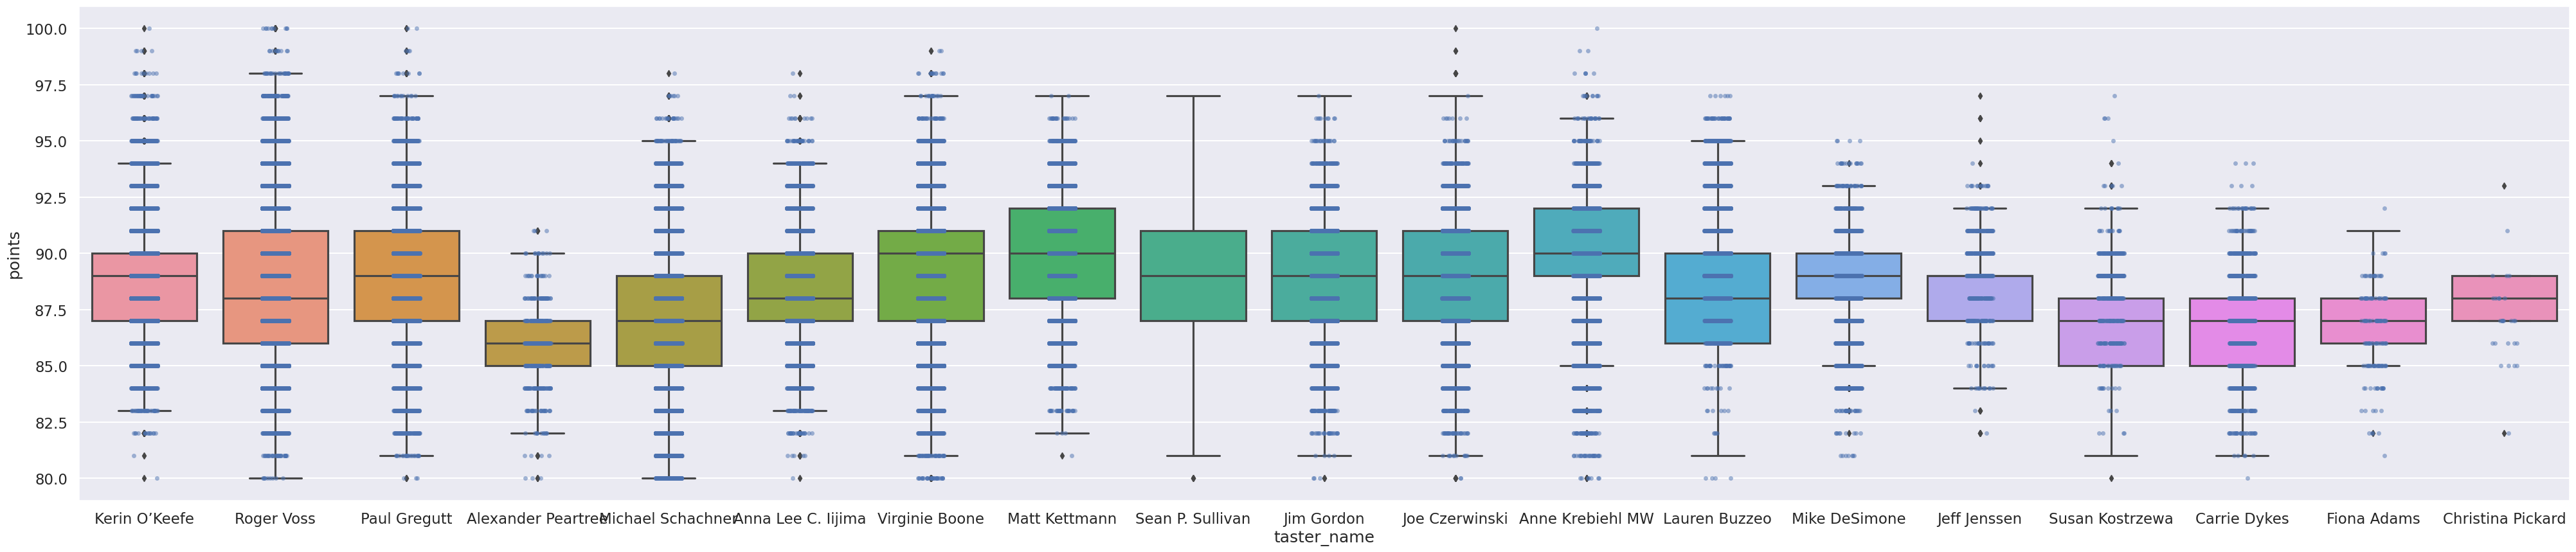

In [30]:
plt.figure(figsize = (50,10))
sns.boxplot(y='points', x='taster_name', 
                 data=wine )
sns.stripplot(y='points', x='taster_name', 
                   data=wine, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.5)
g2.set_title("Taster Name Points Distribuition", fontsize=25)
plt.show()

In [31]:
cnt1 = np.where(wine['points']==100)
for locs in cnt1:
    print(wine.loc[locs,['taster_name','variety']])

           taster_name                     variety
345     Joe Czerwinski                      Muscat
7335               NaN            Prugnolo Gentile
36528       Roger Voss             Champagne Blend
39286              NaN                      Merlot
42197       Roger Voss              Portuguese Red
45781    Kerin O’Keefe                  Sangiovese
45798              NaN          Cabernet Sauvignon
58352       Roger Voss    Bordeaux-style Red Blend
89728       Roger Voss             Champagne Blend
89729       Roger Voss                  Chardonnay
111753      Roger Voss    Bordeaux-style Red Blend
111754             NaN           Sangiovese Grosso
111755      Roger Voss    Bordeaux-style Red Blend
111756      Roger Voss    Bordeaux-style Red Blend
113929    Paul Gregutt                       Syrah
114972      Roger Voss                        Port
118058             NaN    Bordeaux-style Red Blend
122935      Roger Voss  Bordeaux-style White Blend
123545    Paul Gregutt         

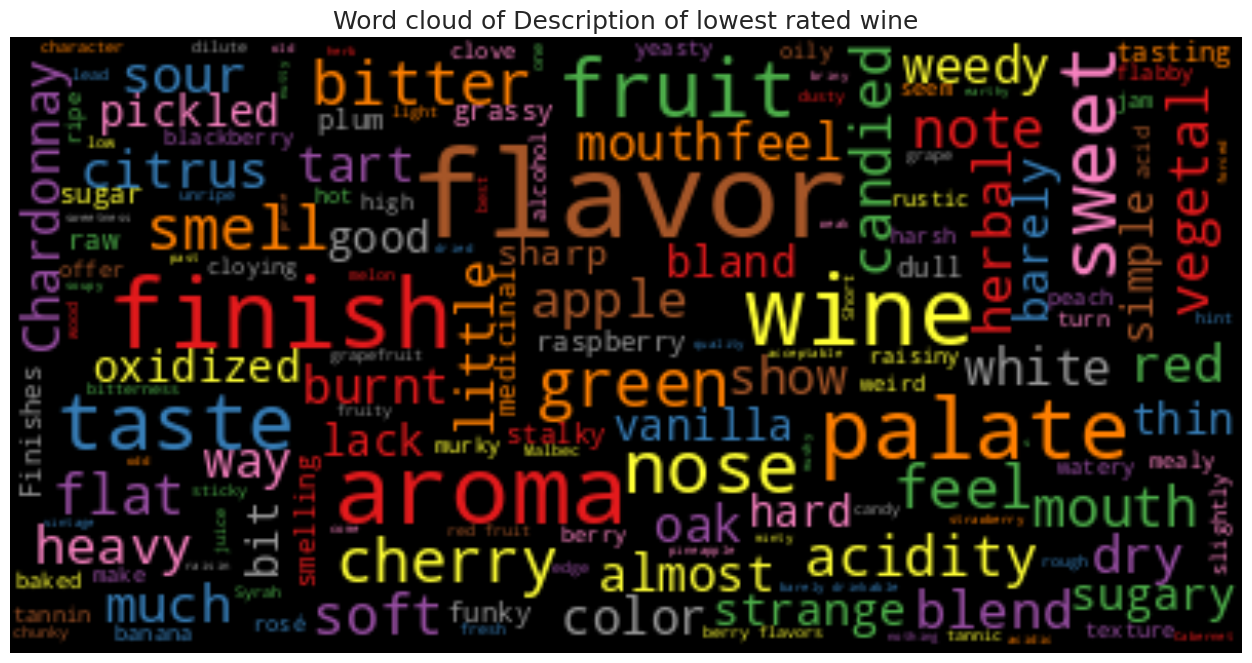

In [32]:
sns.set_context("talk")
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description of lowest rated wine')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine[wine['points']==80]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

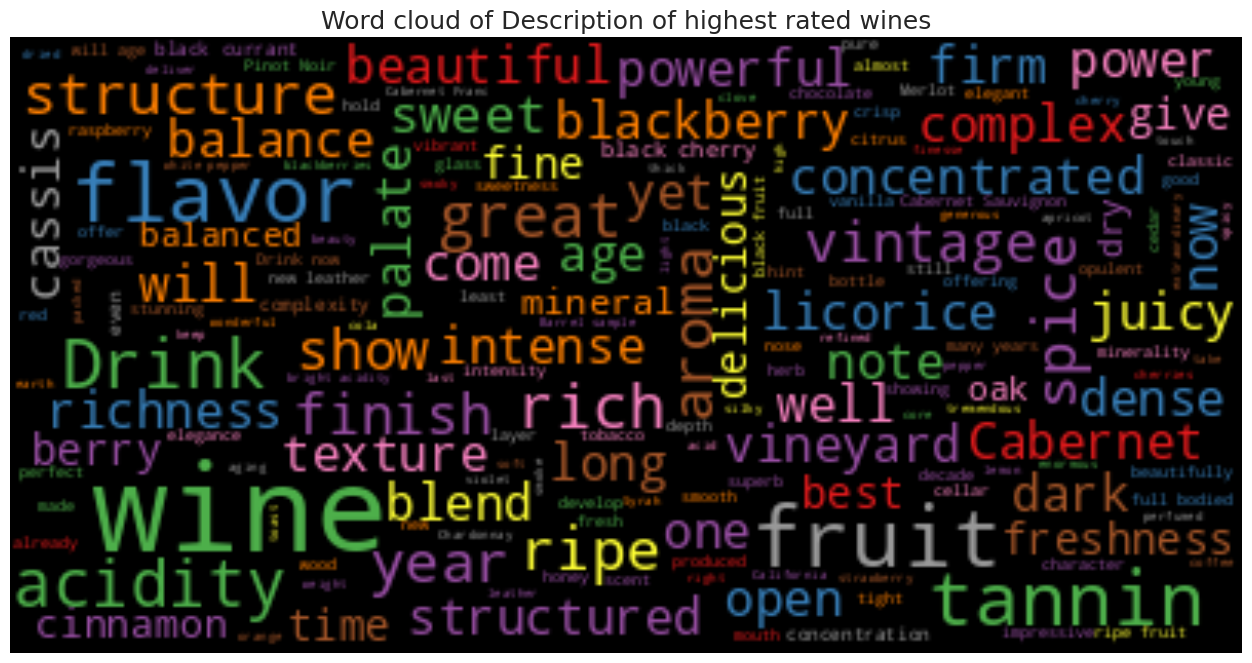

In [33]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description of highest rated wines')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine[wine['points']>=97]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

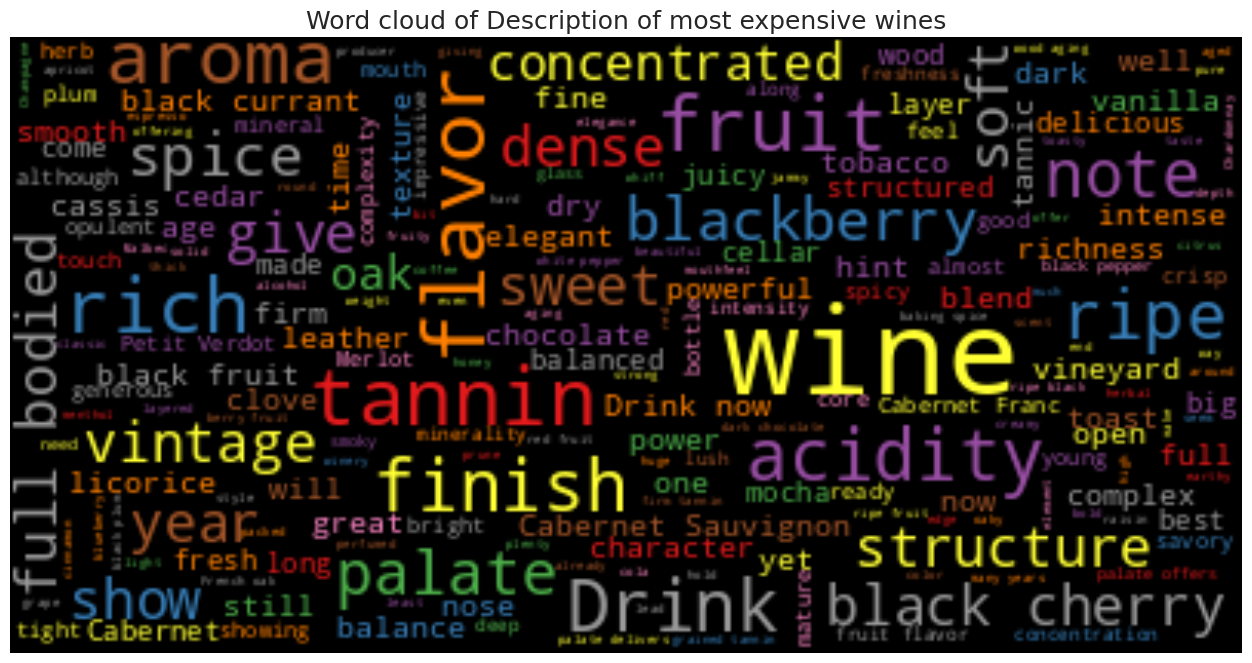

In [34]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description of most expensive wines')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine[wine['price']>=108]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

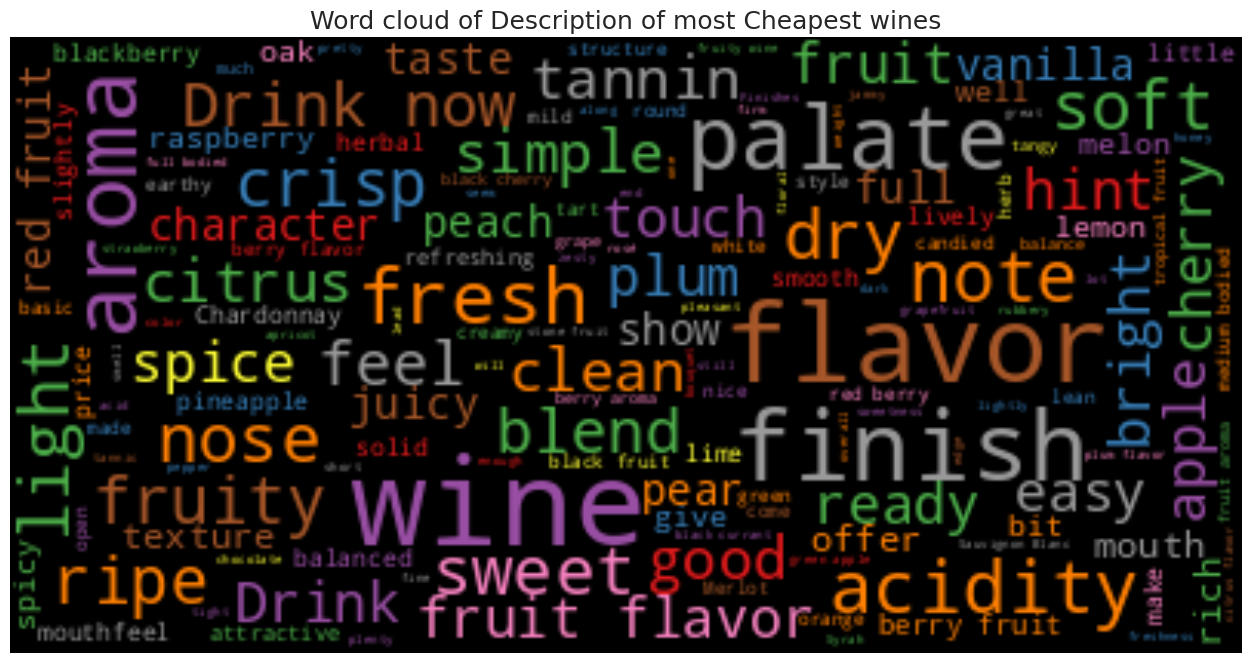

In [35]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description of most Cheapest wines')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine[wine['price']<=10]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

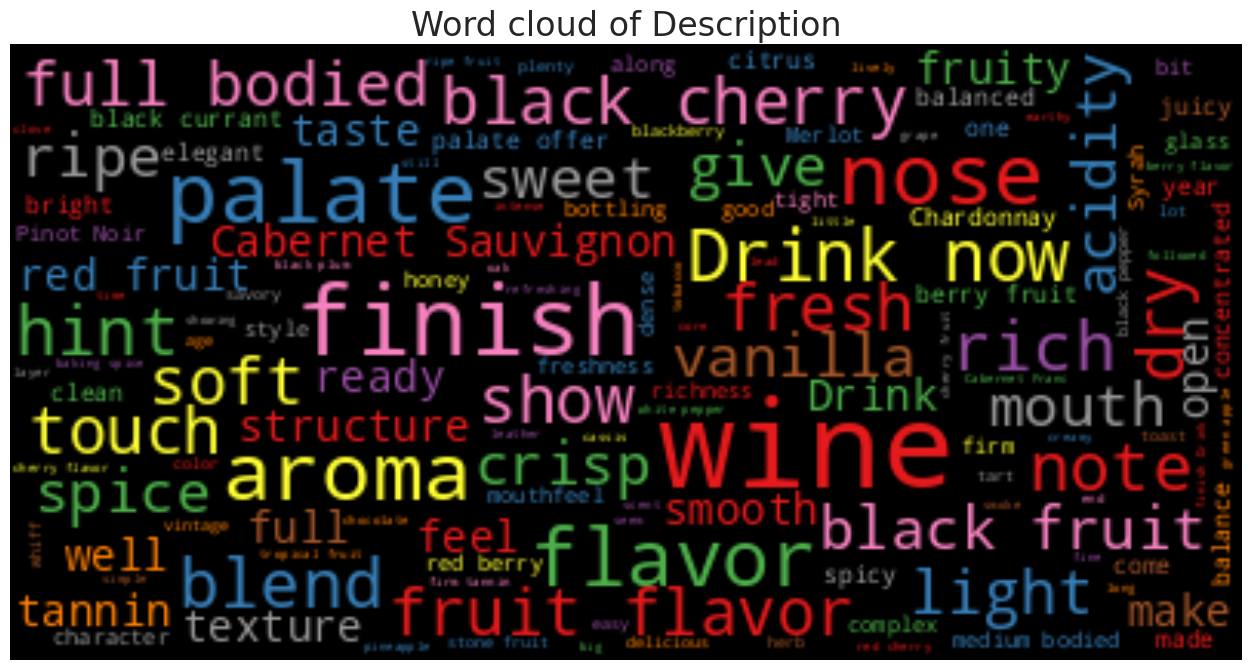

In [36]:
sns.set_context('poster')
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
wine = wine.assign(desc_length = wine['description'].apply(len))

<ipython-input-38-c34e54898c27>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


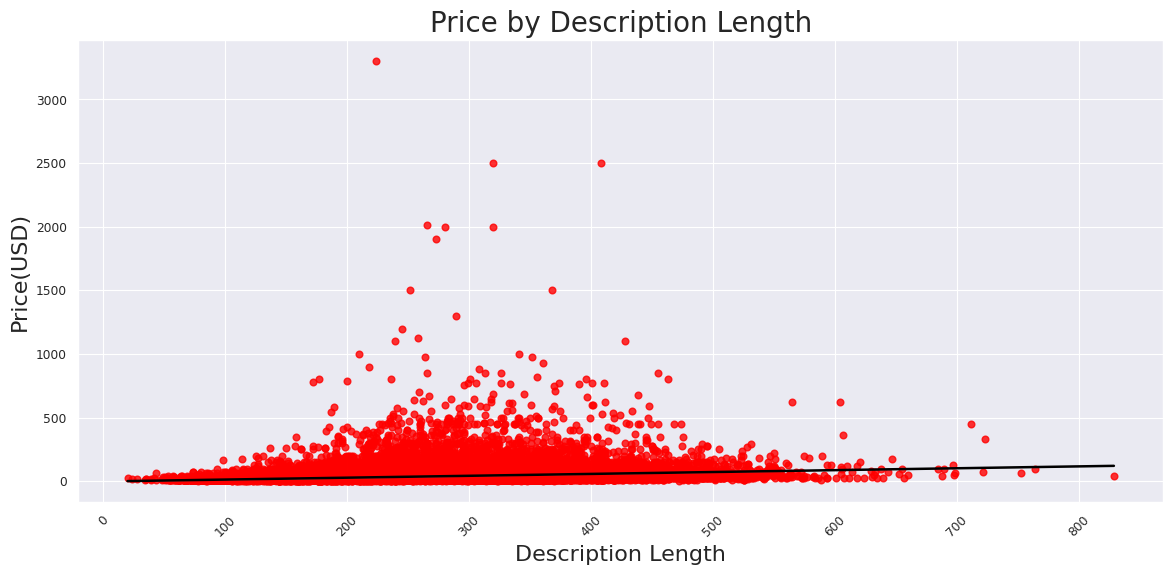

In [38]:
sns.set_context('paper')
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price',
                data=wine, fit_reg=True,  line_kws={'color':'black'},color = 'red' )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

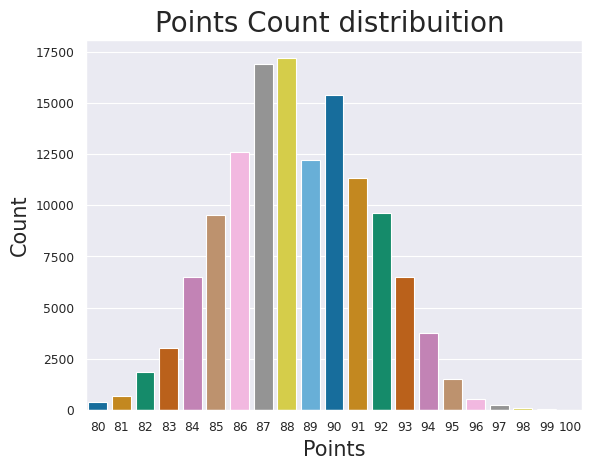

In [39]:
g = sns.countplot(x='points', data=wine, palette = 'colorblind') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font


plt.show() #rendering the graphs

<ipython-input-40-b8a5c3c8bd5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= wine.corr()


points     price  desc_length
points       1.000000  0.399231     0.557760
price        0.399231  1.000000     0.248427
desc_length  0.557760  0.248427     1.000000

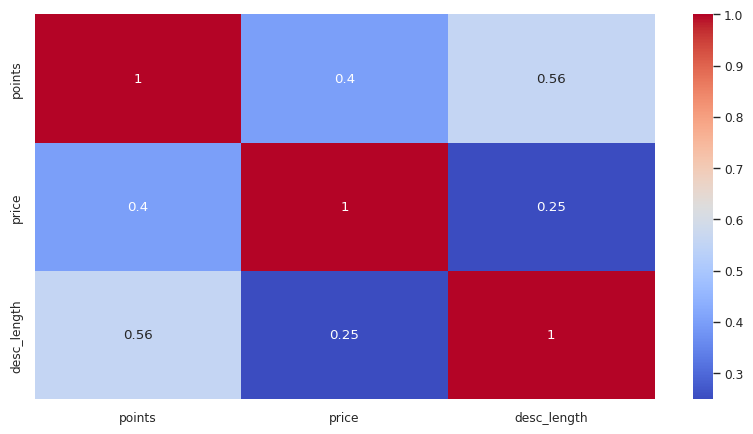

In [40]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= wine.corr()
sns.heatmap(c,cmap="coolwarm",annot=True) #BrBG, RdGy, coolwarm
c

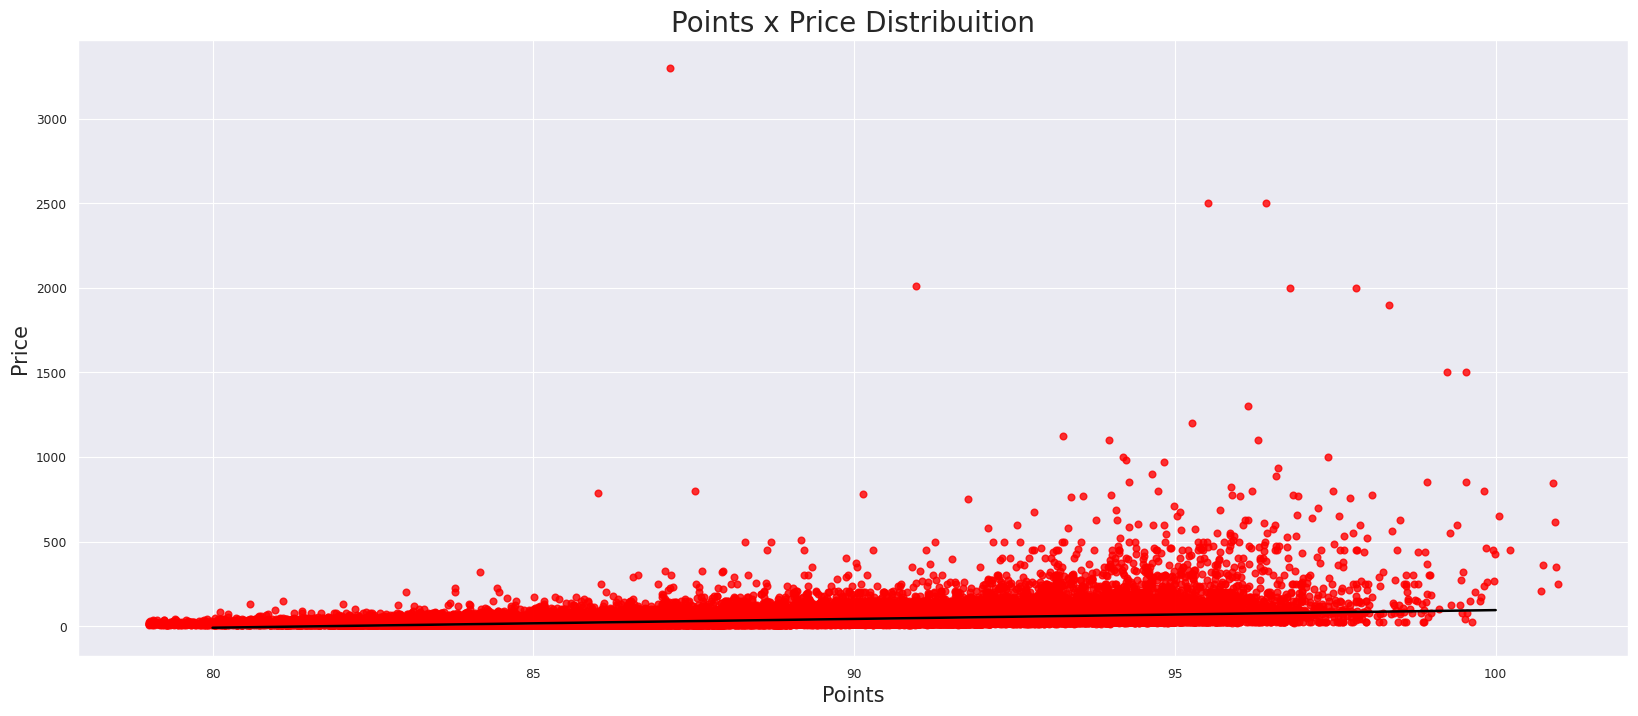

In [41]:
plt.figure(figsize=(20,8))

g = sns.regplot(x='points', y='price', 
                data=wine, line_kws={'color':'black'},
                x_jitter=True, fit_reg=True, color = 'red')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

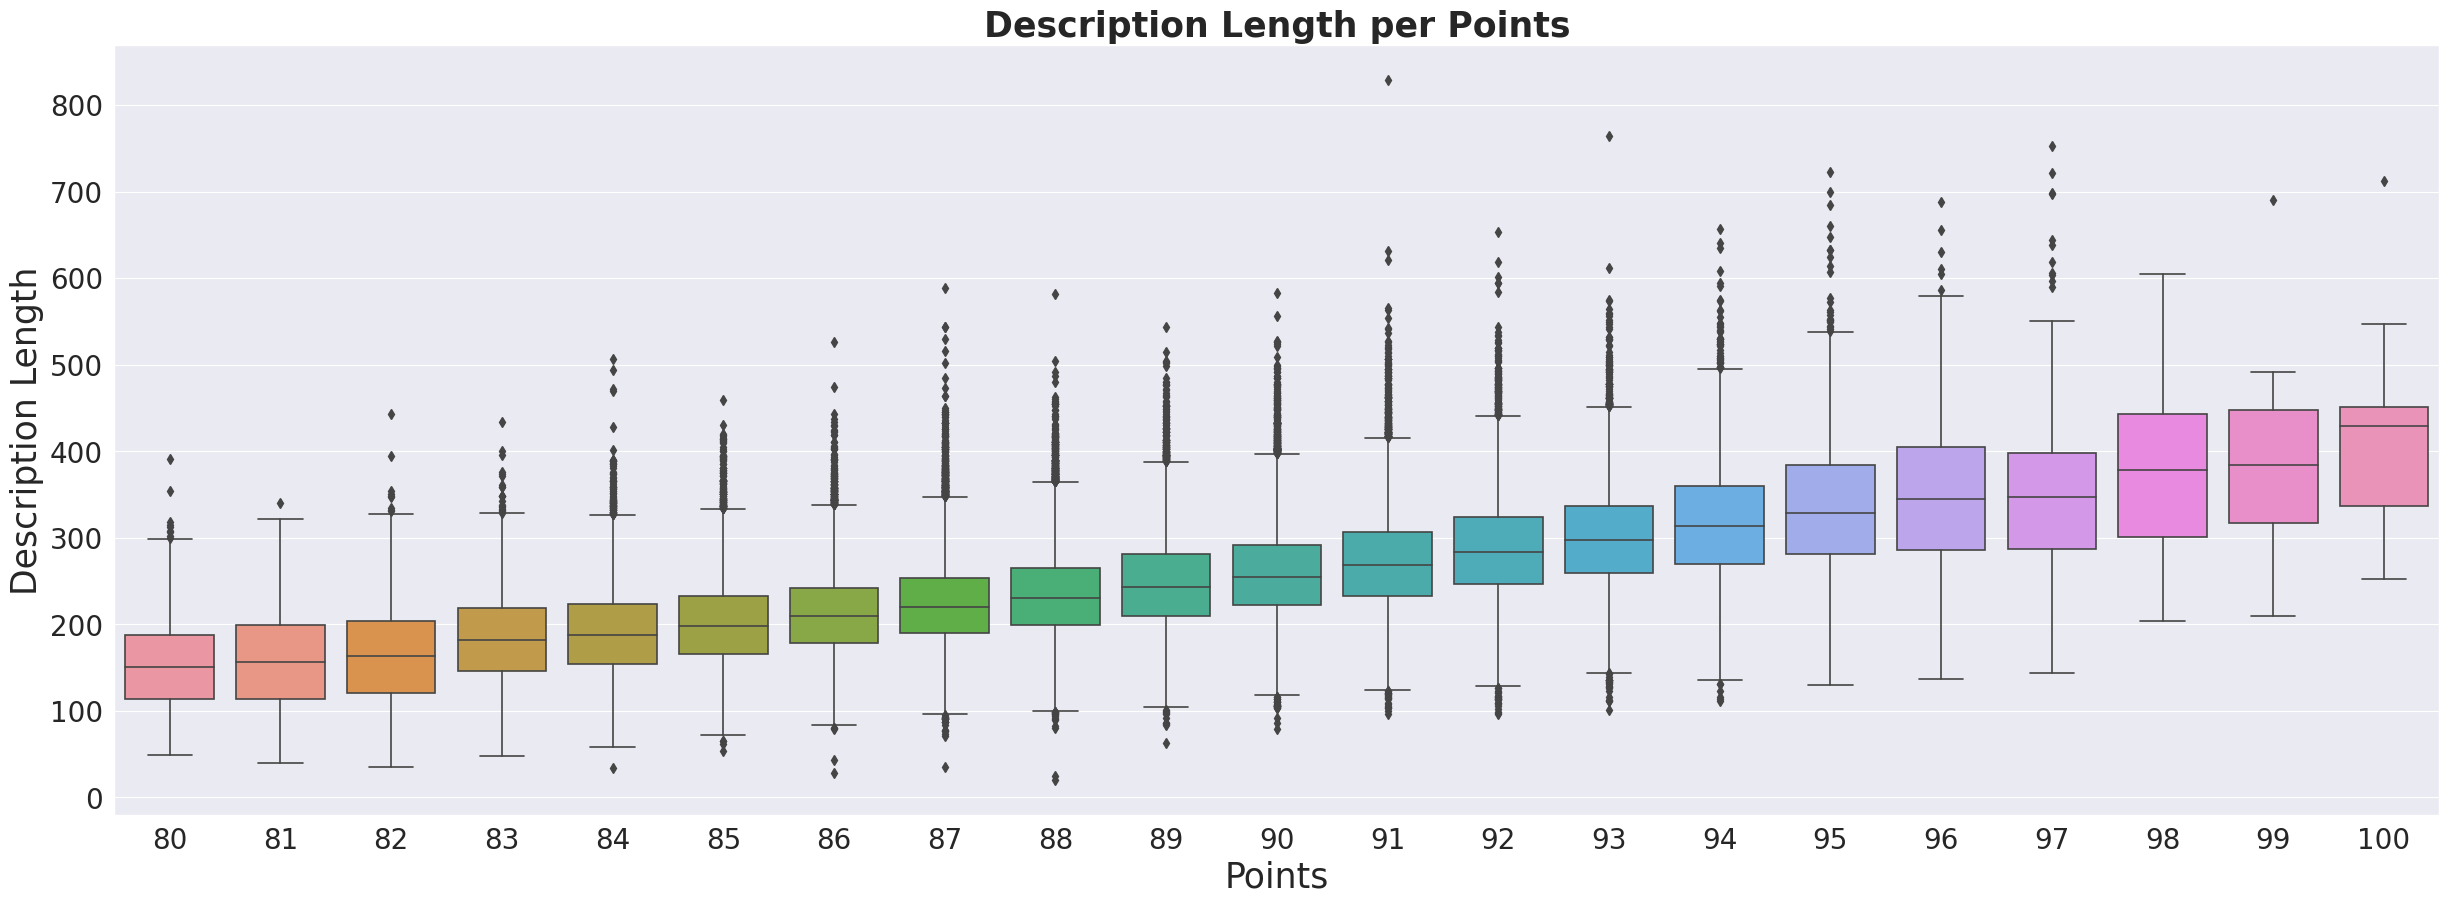

In [42]:
wine = wine.assign(description_length = wine['description'].apply(len))
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=wine)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [43]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

wine["rating_cat"] = wine["points"].apply(cat_points)

<Axes: title={'center': 'Number of wines per points'}, xlabel='rating_cat', ylabel='Number of wines'>

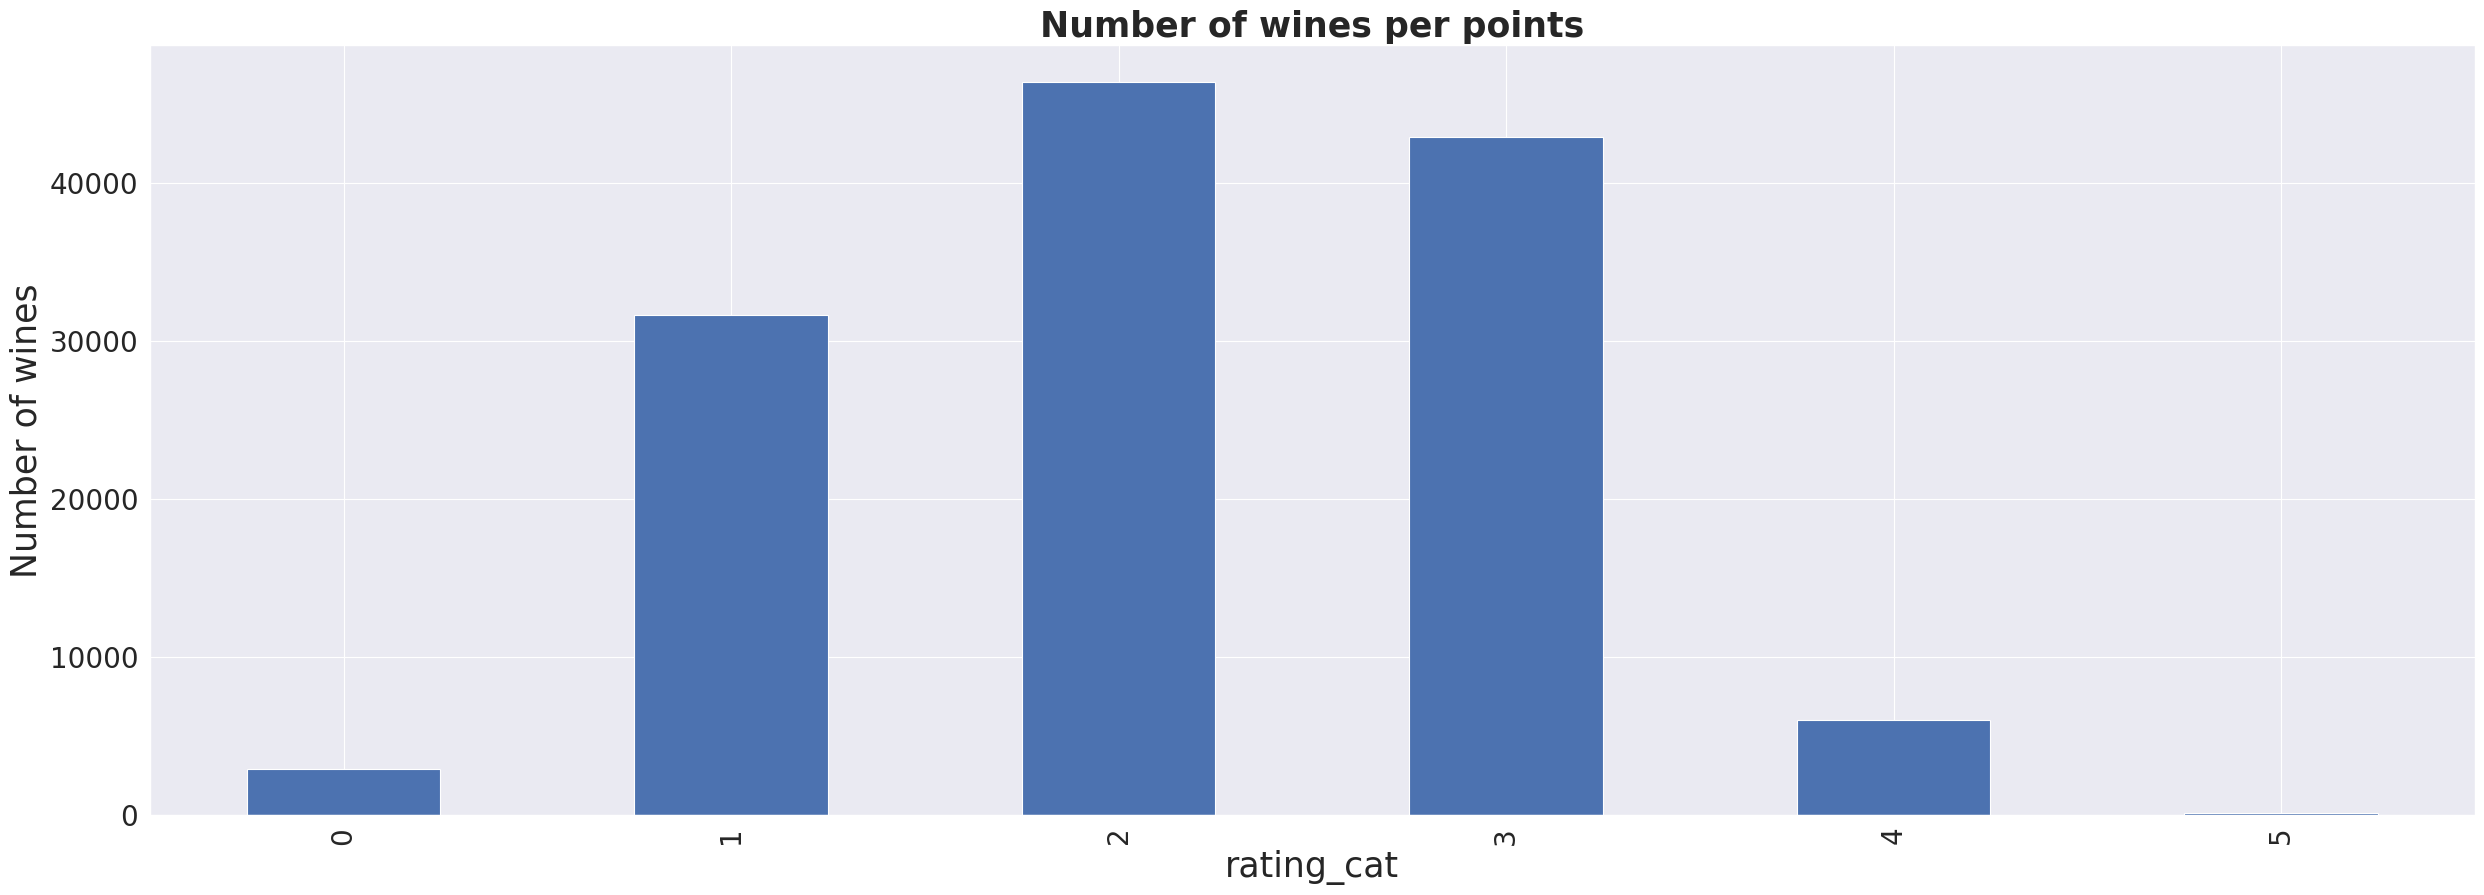

In [44]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
wine.groupby(['rating_cat']).count()['description'].plot(ax=ax, kind='bar')

In [45]:
#given_point = int(input("Your preferred point: "))
#given_price = float(input("Whats your budget, in dollars?: "))

given_point = 96 #dummy value
given_price = 20 #dummy value
found = False
for row_index,row in wine.iterrows():
    if row['points']==given_point and row['price']<given_price:
        print(row['variety'], "   ", row['price'], "   ", row['points'])
        found = True
if(not found):
    print("Sorry, not found.")

Sorry, not found.


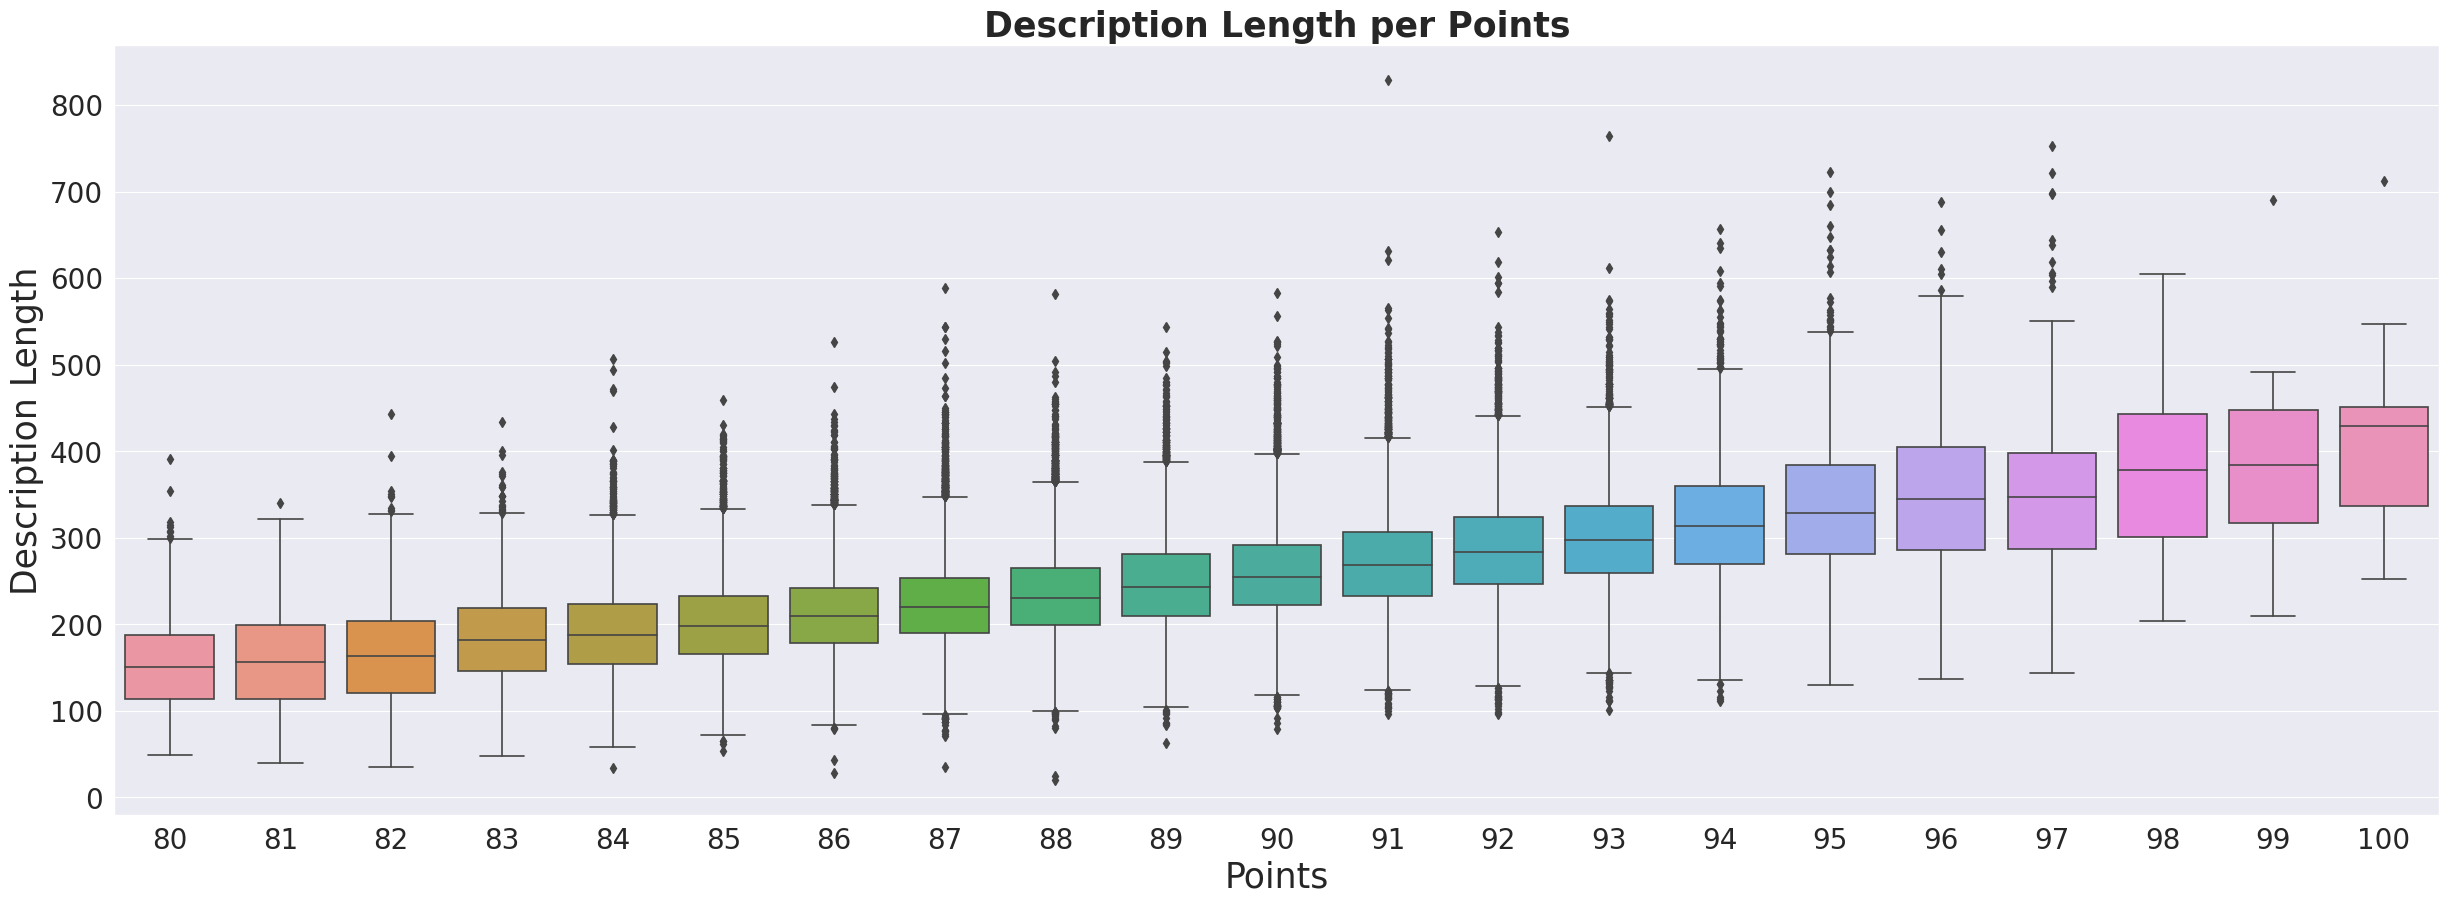

In [46]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='desc_length', data=wine)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
wine['price_log'] = np.log(wine['price'])
wine.head(2)

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87   25.0   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   

            province    taster_name  \
0  Sicily & Sardinia  Kerin O’Keefe   
1              Douro     Roger Voss   

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery  desc_length  description_length  rating_cat  price_log  
0              Nicosia          172                 172           2   3.218876  
1  Quinta dos Avidagos          227                 227           2   2.708050

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = wine.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

In [50]:
def sentiment_analyzer_scores(sentence):
    score = SIA.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [51]:
print(sentiment_analyzer_scores("yaaaaay"))
print(sentiment_analyzer_scores("Today is a sunny day #love"))
print(sentiment_analyzer_scores("UGGHHH SUCH A BORING DAY"))
print(sentiment_analyzer_scores("i like kaggle a lot lol"))
print(sentiment_analyzer_scores("i like kaggle a lot!!"))

yaaaaay--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Today is a sunny day #love-------------- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
None
UGGHHH SUCH A BORING DAY---------------- {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}
None
i like kaggle a lot lol----------------- {'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.6486}
None
i like kaggle a lot!!------------------- {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4738}
None


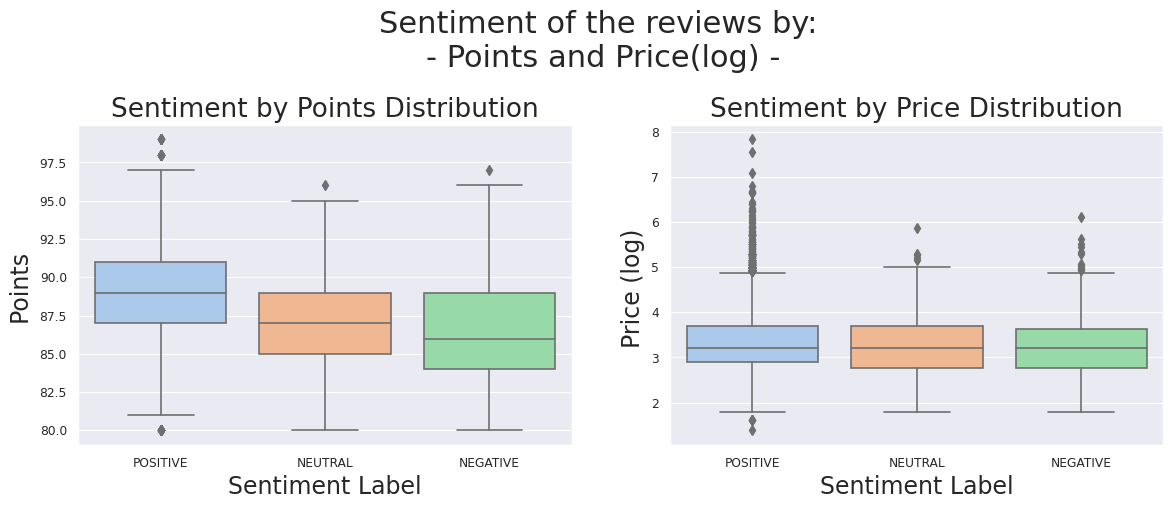

In [52]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment,palette = 'pastel')
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment,palette = 'pastel')
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

In [53]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [54]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']

wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [55]:
wine_pivot_matrix

<621x394 sparse matrix of type '<class 'numpy.float64'>'
	with 3033 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

In [57]:
trial = wine[['price', 'points']]
data = np.asarray([np.asarray(trial['price']), np.asarray(trial['points'])]).T

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

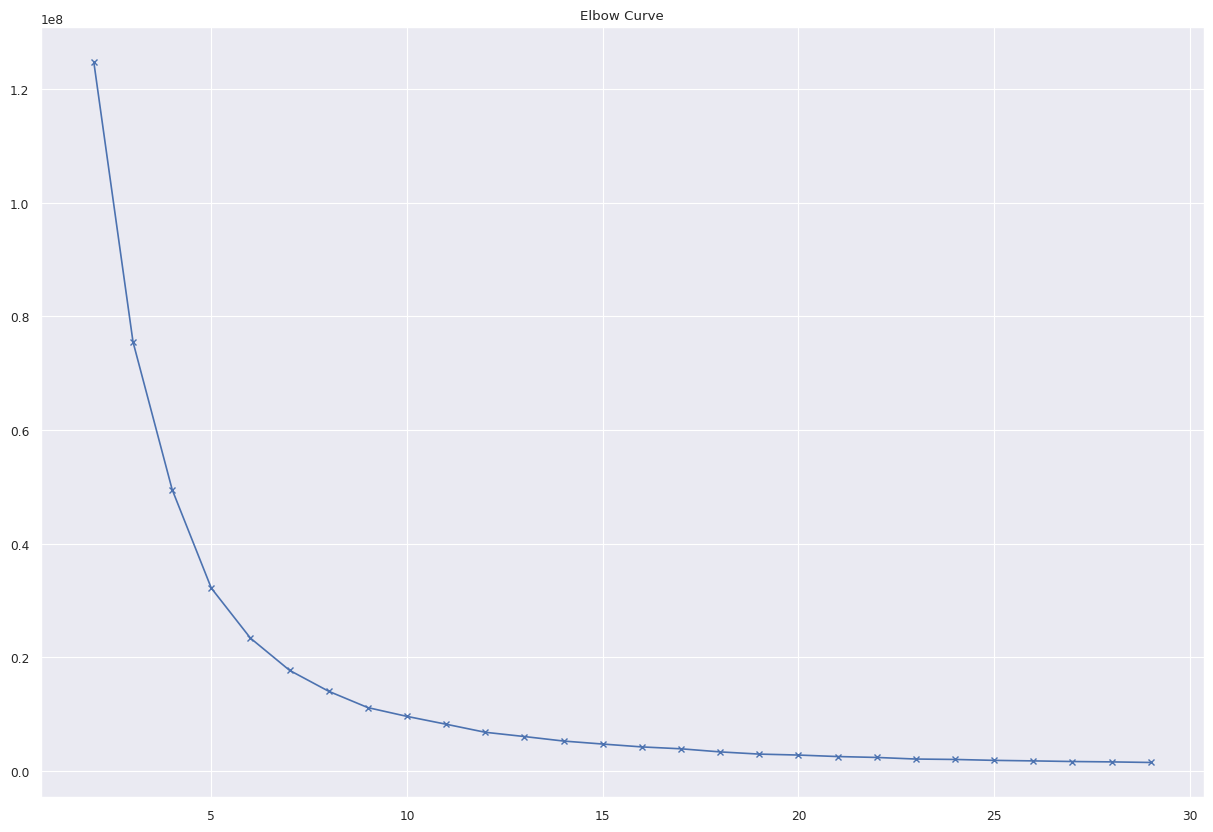

In [58]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")
plt.show()


In [59]:
knn = NearestNeighbors(n_neighbors=7, algorithm = 'brute',metric = 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [60]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recommendation for ## Malagouzia ##:
1: Malagousia with distance: 0.7549123362273612
2: White Blend with distance: 0.8277277452908425
3: Tannat with distance: 0.8445583805152697
4: Red Blend with distance: 0.903710263013319
5: Merlot with distance: 0.9242573073627814


Recommendation for ## Argaman ##:
1: Cabernet Sauvignon-Shiraz with distance: 0.7506986498473489
2: Petite Sirah with distance: 0.7876209274300714
3: Carignan with distance: 0.7950550849632435
4: Cabernet Sauvignon with distance: 0.8549571607462896
5: Cabernet Sauvignon-Merlot with distance: 0.86543801046061


Recommendation for ## Moscato ##:
1: Moscato Giallo with distance: 0.5033664692084201
2: Pinot Grigio with distance: 0.5988671929147729
3: Gewürztraminer with distance: 0.6122969571412953
4: White Riesling with distance: 0.6210985033405627
5: Cabernet Sauvignon-Sangiovese with distance: 0.6243658907162679


Recommendation for ## Charbono ##:
1: Malbec-Syrah with distance: 0.0
2: Roussanne-Grenache Blanc with distan